## Downloading Required Libraries

In [3]:
excel_file = "merged_data.xlsx"

In [1]:
!pip install pandas
!pip install gensim
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install wordcloud matplotlib
!pip install yfinance
!pip install --upgrade openpyxl
!pip install statsmodels
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
# run this code cell before any other cell
# install pandas 2.2.0 if in colab environment
import sys

if 'google.colab' in sys.modules:
  !pip install pandas==2.2.0

In [2]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import plotly.express as px
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import yfinance as yf
from datetime import date, timedelta
from scipy.stats import pearsonr
%matplotlib inline
from transformers import pipeline
import itertools
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##  Stock Price, Revenue and EBIT (Financial Analysis)

In [ ]:
today = date.today()
today

datetime.date(2024, 5, 6)

In [ ]:
end_date = today.strftime("%Y-%m-%d")
end_date

'2024-05-06'

In [ ]:
d1 = date.today() - timedelta(days=360*7) # timespan of last 7 years
d1

datetime.date(2017, 6, 12)

In [ ]:
start_date = d1.strftime("%Y-%m-%d")
start_date

'2017-06-12'

In [ ]:
boeing = yf.download(tickers = "BA",
                  start = start_date,
                  end = end_date)
boeing.name = 'Boeing'

airbus = yf.download(tickers = "EADSY",
                  start = start_date,
                  end = end_date)
airbus.name = 'Airbus'

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
boeing.shape, airbus.shape

((1736, 6), (1736, 6))

In [ ]:
boeing.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-12,190.300003,190.529999,188.050003,190.000000,179.032654,2730100
2017-06-13,190.050003,191.559998,189.350006,191.089996,180.059723,1882700
2017-06-14,191.050003,193.380005,190.820007,192.380005,181.275284,2210000
2017-06-15,191.429993,195.550003,191.369995,195.449997,184.168060,2894100
2017-06-16,196.009995,197.949997,195.809998,196.440002,185.100922,6939100


In [ ]:
boeing.reset_index(inplace=True)
airbus.reset_index(inplace=True)

In [ ]:
airline_index_filtered = yf.download(tickers = "^XAL",
                   start = start_date,
                  end = end_date)
airline_index_filtered.name = 'NYSE ARCA Airline Index'

[*********************100%%**********************]  1 of 1 completed


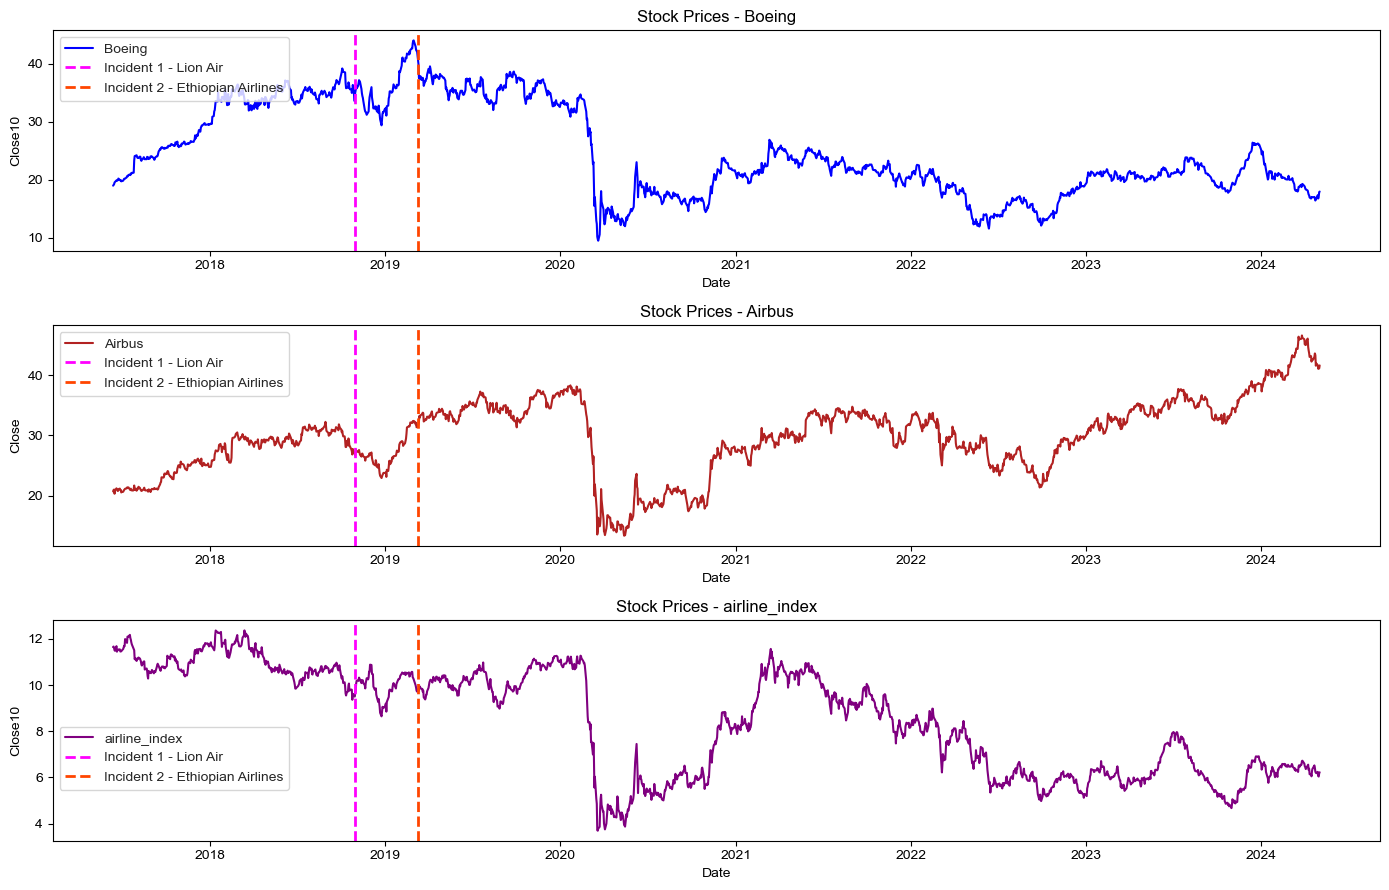

In [ ]:
boeing['Close10'] = boeing['Close'] / 10
airline_index_filtered['Close10'] = airline_index_filtered['Close'] / 10

fig, axes = plt.subplots(3, 1, figsize=(14, 9))  # Changed to 3 subplots
sns.set_style("ticks")

sns.lineplot(data=boeing, x="Date", y="Close10", color='blue', label="Boeing", ax=axes[0])
axes[0].set_title("Stock Prices - Boeing")
axes[0].legend()  # Add legend to subplot 1

# Plotting for the second subplot (Airbus)
sns.lineplot(data=airbus, x="Date", y="Close", color='firebrick', label="Airbus", ax=axes[1])
axes[1].set_title("Stock Prices - Airbus")
axes[1].legend()  # Add legend to subplot 2

# Plotting for the third subplot (airline_index_filtered)
sns.lineplot(data=airline_index_filtered, x="Date", y="Close10", color="purple", label="airline_index", ax=axes[2])
axes[2].set_title("Stock Prices - airline_index")
axes[2].legend()  # Add legend to subplot 3

incident_dates = ['2018-10-29', '2019-03-10']
incident_labels = ['Incident 1 - Lion Air', 'Incident 2 - Ethiopian Airlines']
incident_colors = ['fuchsia', 'orangered', 'seagreen']  # Specify colors for each incident

incident_dates = pd.to_datetime(incident_dates)

# Add vertical lines for incidents on all subplots
for incident_date, incident_label, incident_color in zip(incident_dates, incident_labels, incident_colors):
    for ax in axes:
        ax.axvline(x=incident_date, color=incident_color, linestyle='--', linewidth=2, label=incident_label)
axes[0].legend(loc='upper left', bbox_to_anchor=(0, 1))
axes[1].legend(loc='upper left', bbox_to_anchor=(0, 1))
axes[2].legend(loc='lower left', bbox_to_anchor=(0, 0.2))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
com_boeing = pd.read_excel(excel_file, sheet_name="Financials Commercial Flights B")

In [ ]:
com_boeing.head()

,Unnamed: 0,Revenue,Earnings/Loss from Operations (EBIT),Source
0,2023,33901,-1635,https://s2.q4cdn.com/661678649/files/doc_finan...
1,2022,26026,-2341,https://s2.q4cdn.com/661678649/files/doc_finan...
2,2021,19493,-6475,https://s2.q4cdn.com/661678649/files/doc_finan...
3,2020,16162,-13847,https://s2.q4cdn.com/661678649/files/doc_finan...
4,2019,32255,-6657,https://s2.q4cdn.com/661678649/files/doc_finan...


In [ ]:
com_boeing.rename(columns={'Unnamed: 0': 'Year', 'Earnings/Loss from Operations (EBIT)': 'EBIT'}, inplace=True)

In [ ]:
com_boeing.head()

,Year,Revenue,EBIT,Source
0,2023,33901,-1635,https://s2.q4cdn.com/661678649/files/doc_finan...
1,2022,26026,-2341,https://s2.q4cdn.com/661678649/files/doc_finan...
2,2021,19493,-6475,https://s2.q4cdn.com/661678649/files/doc_finan...
3,2020,16162,-13847,https://s2.q4cdn.com/661678649/files/doc_finan...
4,2019,32255,-6657,https://s2.q4cdn.com/661678649/files/doc_finan...


In [ ]:
com_airbus = pd.read_excel(excel_file, sheet_name="Financial commercial flight Air")

In [ ]:
com_airbus.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
com_airbus

,Year,Revenue - In euro millions,EBIT - In euro millions,Ex Rate
0,2023,31507,2306,1.091863
1,2022,41428,4800,1.066212
2,2021,36164,4175,1.132246
3,2020,34250,-1330,1.229861
4,2019,54775,2205,1.120197
5,2018,47970,4295,1.144296
6,2017,50958,3428,0.925840
7,2016,49237,1543,1.105976
8,2015,45854,2301,1.109018
9,2014,42280,2671,1.326960


In [ ]:
com_airbus['Revenue'] = com_airbus['Revenue - In euro millions']*com_airbus['Ex Rate']

In [ ]:
com_airbus['EBIT'] = com_airbus['EBIT - In euro millions']*com_airbus['Ex Rate']

In [ ]:
com_airbus

,Year,Revenue - In euro millions,EBIT - In euro millions,Ex Rate,Revenue,EBIT
0,2023,31507,2306,1.091863,34401.320717,2517.835579
1,2022,41428,4800,1.066212,44171.020365,5117.816398
2,2021,36164,4175,1.132246,40946.557971,4727.128623
3,2020,34250,-1330,1.229861,42122.740130,-1635.715164
4,2019,54775,2205,1.120197,61358.799149,2470.034726
5,2018,47970,4295,1.144296,54891.864058,4914.749971
6,2017,50958,3428,0.925840,47178.964911,3173.780206
7,2016,49237,1543,1.105976,54454.925407,1706.520501
8,2015,45854,2301,1.109018,50852.889933,2551.849342
9,2014,42280,2671,1.326960,56103.885075,3544.311188


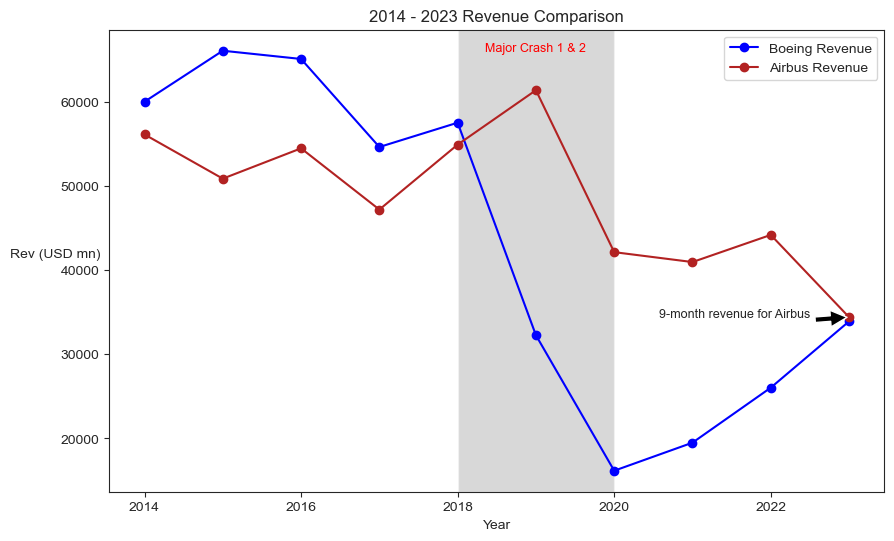

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(com_boeing['Year'], com_boeing['Revenue'], label='Boeing Revenue', marker='o', color = 'blue')
plt.plot(com_airbus['Year'], com_airbus['Revenue'], label='Airbus Revenue', marker='o', color = 'firebrick')

last_point = com_airbus[com_airbus['Year'] == 2023]
plt.annotate('9-month revenue for Airbus',
             xy=(last_point['Year'].values[0], last_point['Revenue'].values[0]),
             xytext=(last_point['Year'].values[0] - 0.5, last_point['Revenue'].values[0] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9,
             ha='right')
plt.axvspan(2018, 2020, facecolor='grey', alpha=0.3)

plt.annotate('Major Crash 1 & 2', xy=(2019, 63000), xytext=(2019, 66000),
             fontsize=9, ha='center', color='red')

plt.title('2014 - 2023 Revenue Comparison')
plt.xlabel('Year')
plt.ylabel('Rev (USD mn)',rotation='horizontal')
plt.legend()

plt.show()

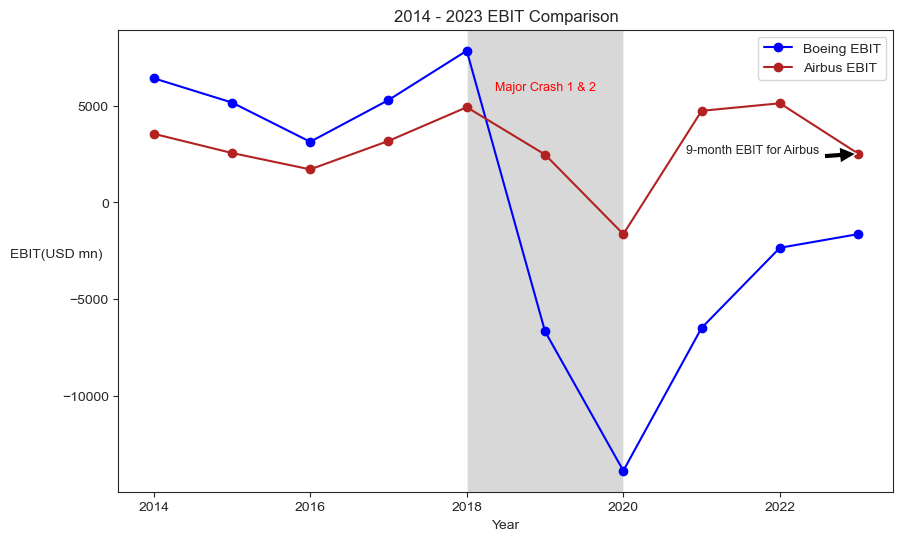

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(com_boeing['Year'], com_boeing['EBIT'], label='Boeing EBIT', marker='o',color = 'blue')
plt.plot(com_airbus['Year'], com_airbus['EBIT'], label='Airbus EBIT', marker='o',color = 'firebrick')


last_point = com_airbus[com_airbus['Year'] == 2023]
plt.annotate('9-month EBIT for Airbus',
             xy=(last_point['Year'].values[0], last_point['EBIT'].values[0]),
             xytext=(last_point['Year'].values[0] - 0.5, last_point['EBIT'].values[0] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9,
             ha='right')


plt.axvspan(2018, 2020, facecolor='grey', alpha=0.3)

plt.annotate('Major Crash 1 & 2', xy=(2019, 5000), xytext=(2019, 5800),
             fontsize=9, ha='center', color='red')

plt.title('2014 - 2023 EBIT Comparison')
plt.xlabel('Year')
plt.ylabel('EBIT(USD mn)', rotation='horizontal')
plt.legend()

plt.show()

### Causal Analysis

In [ ]:
boeing = yf.download(tickers = "BA",
                  start = start_date,
                  end = end_date)
boeing.name = 'Boeing'

airbus = yf.download(tickers = "EADSY",
                  start = start_date,
                  end = end_date)
airbus.name = 'Airbus'

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
start_date_reg = '2017-01-03'
end_date_reg = '2024-02-05'

boeing_reg = yf.download(tickers = "BA",
                  start = start_date_reg,
                  end = end_date_reg)
boeing_reg.name = 'Boeing'
boeing_reg.reset_index(inplace = True)

airbus_reg = yf.download(tickers = "EADSY",
                  start = start_date_reg,
                  end = end_date_reg)
airbus_reg.name = 'Airbus'
airbus_reg.reset_index(inplace = True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
airbus_reg = airbus_reg[['Date', 'Close']]
boeing_reg = boeing_reg[['Date', 'Close']]

In [ ]:
df_reg_airbus = boeing_reg.merge(airbus_reg, on='Date', how='inner', suffixes=('_Boeing', '_Airbus'))
df_reg_airbus

,Date,Close_Boeing,Close_Airbus
0,2017-01-03,156.970001,16.520000
1,2017-01-04,158.619995,16.719999
2,2017-01-05,158.710007,17.090000
3,2017-01-06,159.100006,17.080000
4,2017-01-09,158.320007,17.170000
...,...,...,...
1778,2024-01-29,205.190002,40.500000
1779,2024-01-30,200.440002,40.599998
1780,2024-01-31,211.039993,39.700001
1781,2024-02-01,209.809998,40.200001


In [ ]:
model_airbus = ols('Close_Boeing~Close_Airbus', data = df_reg_airbus).fit()
print(model_airbus.summary())

                            OLS Regression Results                            
Dep. Variable:           Close_Boeing   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     493.1
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.22e-96
Time:                        16:00:31   Log-Likelihood:                -10086.
No. Observations:                1783   AIC:                         2.018e+04
Df Residuals:                    1781   BIC:                         2.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       72.3197      7.995      9.046   

In [ ]:
boeing.reset_index(inplace=True)
airbus.reset_index(inplace=True)

In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Causal Analysis- airbus

boeing_pre = yf.download(tickers = "BA",
                  start = '2019-03-06',
                  end = '2019-03-09')
boeing_pre.name = 'Boeing'


boeing_post = yf.download(tickers = "BA",
                  start = '2019-03-11',
                  end = '2019-03-15')
boeing_post.name = 'Boeing'

airbus_reg_pre = airbus_reg.loc[
    (airbus_reg['Date'] >= '2019-03-06') & (airbus_reg['Date'] <= '2019-03-09')]

airbus_reg_post = airbus_reg.loc[
    (airbus_reg['Date'] >= '2019-03-11') & (airbus_reg['Date'] <= '2019-03-14')]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
airbus_reg_pre.reset_index(drop = True, inplace = True)
airbus_reg_post.reset_index(drop = True, inplace = True)
boeing_pre.reset_index(inplace = True)
boeing_post.reset_index(inplace = True)

In [ ]:
airbus_reg_post

,Date,Close
0,2019-03-11,31.780001
1,2019-03-12,32.349998
2,2019-03-13,33.250000
3,2019-03-14,32.970001


In [ ]:
boeing.reset_index(inplace=True)
airbus.reset_index(inplace=True)

In [ ]:
boeing_pre['period'] = 'pre'
boeing_post['period'] = 'post'
airbus_reg_pre['period'] = 'pre'
airbus_reg_post['period'] = 'post'

boeing_pre['treatment'] = 'treat'
boeing_post['treatment'] = 'treat'
airbus_reg_pre['treatment'] = 'control'
airbus_reg_post['treatment'] = 'control'

C:\Users\ISHIKA GUPTA\AppData\Local\Temp\ipykernel_21968\2289644750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbus_reg_pre['period'] = 'pre'
C:\Users\ISHIKA GUPTA\AppData\Local\Temp\ipykernel_21968\2289644750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbus_reg_post['period'] = 'post'
C:\Users\ISHIKA GUPTA\AppData\Local\Temp\ipykernel_21968\2289644750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [ ]:
airbus_reg_pre

,Date,Close,period,treatment
0,2019-03-06,32.099998,pre,control
1,2019-03-07,31.360001,pre,control
2,2019-03-08,31.379999,pre,control


In [ ]:
frames = [boeing_pre, boeing_post, airbus_reg_pre, airbus_reg_post]
frames

[        Date        Open        High         Low       Close   Adj Close  \
 0 2019-03-06  429.700012  432.000000  422.079987  424.459991  414.518463   
 1 2019-03-07  423.359985  434.350006  416.440002  422.559998  412.662964   
 2 2019-03-08  416.769989  423.429993  415.500000  422.540009  412.643463   
 
     Volume period treatment  
 0  4159400    pre     treat  
 1  4893600    pre     treat  
 2  3794900    pre     treat  ,
         Date        Open        High         Low       Close   Adj Close  \
 0 2019-03-11  371.269989  402.670013  365.549988  400.010010  390.641144   
 1 2019-03-12  384.709991  390.000000  368.000000  375.410004  366.617310   
 2 2019-03-13  378.429993  381.769989  363.329987  377.140015  368.306824   
 3 2019-03-14  374.989990  380.390015  372.100006  373.299988  364.556702   
 
      Volume period treatment  
 0  34742200   post     treat  
 1  36922600   post     treat  
 2  32662300   post     treat  
 3  13514100   post     treat  ,
         Date    

In [ ]:
causal_df1 = pd.concat(frames)
causal_df1.reset_index(inplace = True)

In [ ]:
causal_df1 = causal_df1[['Date','Close', 'period', 'treatment']]
causal_df1

,Date,Close,period,treatment
0,2019-03-06,424.459991,pre,treat
1,2019-03-07,422.559998,pre,treat
2,2019-03-08,422.540009,pre,treat
3,2019-03-11,400.010010,post,treat
4,2019-03-12,375.410004,post,treat
5,2019-03-13,377.140015,post,treat
6,2019-03-14,373.299988,post,treat
7,2019-03-06,32.099998,pre,control
8,2019-03-07,31.360001,pre,control
9,2019-03-08,31.379999,pre,control


In [ ]:
pre_values = causal_df1[(causal_df1['period'] == 'pre') & (causal_df1['treatment'].isin(['treat', 'control']))] # Extract relevant columns
boeing_stock_prices = pre_values.loc[pre_values['treatment'] == 'treat', 'Close']
airbus_index_prices = pre_values.loc[pre_values['treatment'] == 'control', 'Close'] # Calculate correlation coefficient and p-value

correlation_coefficient, p_value = pearsonr(boeing_stock_prices, airbus_index_prices)

print("Correlation coefficient:", round(correlation_coefficient,2))

print("P-value:", round(p_value,2))

Correlation coefficient: 1.0
P-value: 0.02


In [ ]:
causal_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14 non-null     datetime64[ns]
 1   Close      14 non-null     float64       
 2   period     14 non-null     object        
 3   treatment  14 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 580.0+ bytes


In [ ]:
causal_df1['Treatment'] = pd.get_dummies(causal_df1['treatment'], drop_first=True)  # treat=1, control=0
causal_df1['Post'] = (causal_df1['period'] == 'post').astype(int)

In [ ]:
formula = 'Close ~ Treatment + Post + Treatment:Post'

In [ ]:
model = ols(formula, data=causal_df1).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3367.
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.56e-15
Time:                        16:02:49   Log-Likelihood:                -44.461
No. Observations:                  14   AIC:                             96.92
Df Residuals:                      10   BIC:                             99.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.6133      3.958      7.

C:\Users\ISHIKA GUPTA\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
params = model.params
params

Intercept          31.613333
Treatment         391.573333
Post                0.974167
Treatment:Post    -42.695829
dtype: float64

In [ ]:
coeff_Treatment_Post = params[3]
coeff_Post = params[2]

In [ ]:
DiD_estimator = round(coeff_Treatment_Post - coeff_Post,2)
print("Difference-in-Differences (DiD) Estimator:", DiD_estimator)

Difference-in-Differences (DiD) Estimator: -43.67


In [ ]:
boeing_concat = pd.concat([boeing_pre, boeing_post])

airbus_concat = pd.concat([airbus_reg_pre,airbus_reg_post])

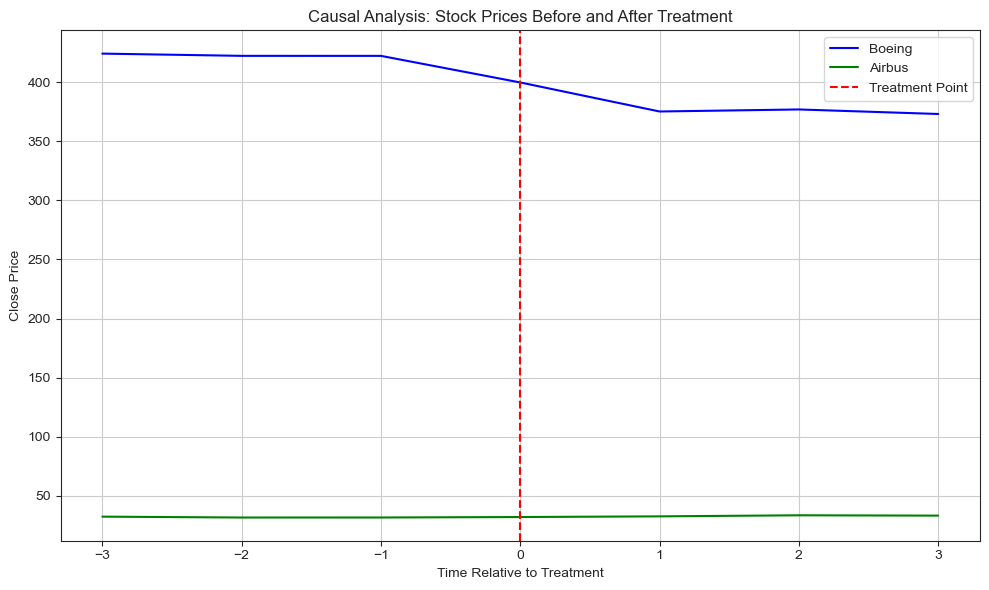

In [ ]:
plt.figure(figsize=(10, 6))

# Define time points relative to treatment
time_points = [-3, -2, -1, 0, 1, 2, 3]

# Plotting Boeing stock prices
plt.plot(time_points[:len(boeing_concat['Close'])], boeing_concat['Close'], label='Boeing', color='blue')

# Plotting Airbus stock prices
plt.plot(time_points[:len(airbus_concat['Close'])], airbus_concat['Close'], label='Airbus', color='green')

# Add red line at time point 0
plt.axvline(x=0, color='red', linestyle='--', label='Treatment Point')

plt.xlabel('Time Relative to Treatment')
plt.ylabel('Close Price')
plt.title('Causal Analysis: Stock Prices Before and After Treatment')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



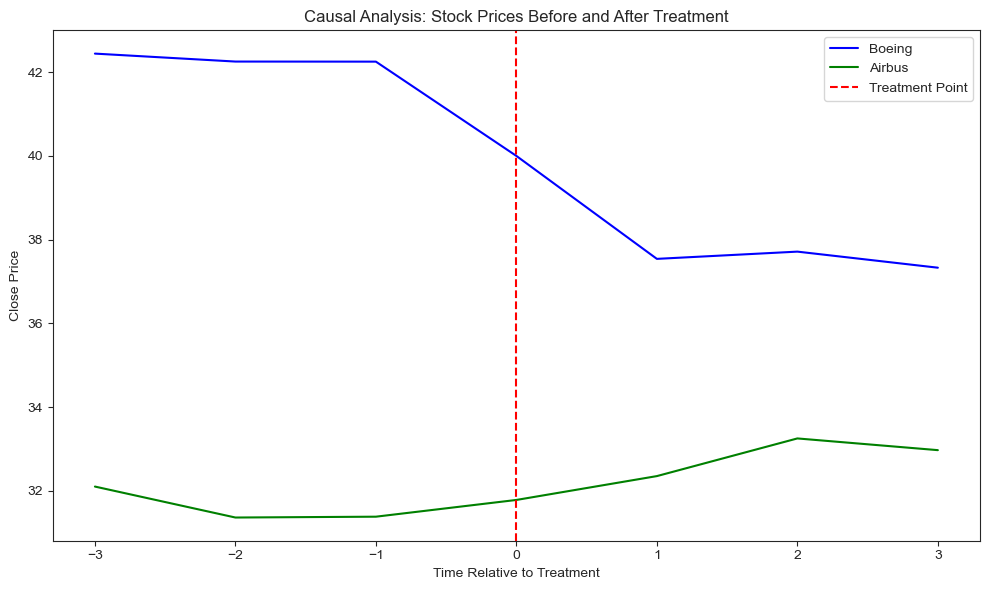

In [ ]:
# Scale down Boeing stock prices by dividing by 10
scaled_boeing_prices = [price / 10 for price in boeing_concat['Close']]

plt.figure(figsize=(10, 6))

# Define time points relative to treatment
time_points = [-3, -2, -1, 0, 1, 2, 3]

# Plotting scaled Boeing and Airbus stock prices
plt.plot(time_points[:len(scaled_boeing_prices)], scaled_boeing_prices, label='Boeing', color='blue')
plt.plot(time_points[:len(airbus_concat['Close'])], airbus_concat['Close'], label='Airbus', color='green')

# Adding a red line at time point 0
plt.axvline(x=0, color='red', linestyle='--', label='Treatment Point')

# Adding labels, title, legend, and grid
plt.xlabel('Time Relative to Treatment')
plt.ylabel('Close Price')
plt.title('Causal Analysis: Stock Prices Before and After Treatment')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


### Negative price stickiness

In [ ]:
# Identify the price at the treatment point for Boeing and Airbus
boeing_price_at_treatment = scaled_boeing_prices[2]  # Assuming treatment point is at index 2

# Calculate the percentage decrease in price after treatment for Boeing and Airbus
percentage_decrease_boeing = ((boeing_price_at_treatment - scaled_boeing_prices[-1]) / boeing_price_at_treatment) * 100
percentage_decrease_boeing = round(percentage_decrease_boeing, 2)

print("Boeing:")
print("Percentage decrease after treatment:", percentage_decrease_boeing, "%")

Boeing:
Percentage decrease after treatment: 11.65 %


[*********************100%%**********************]  1 of 1 completed


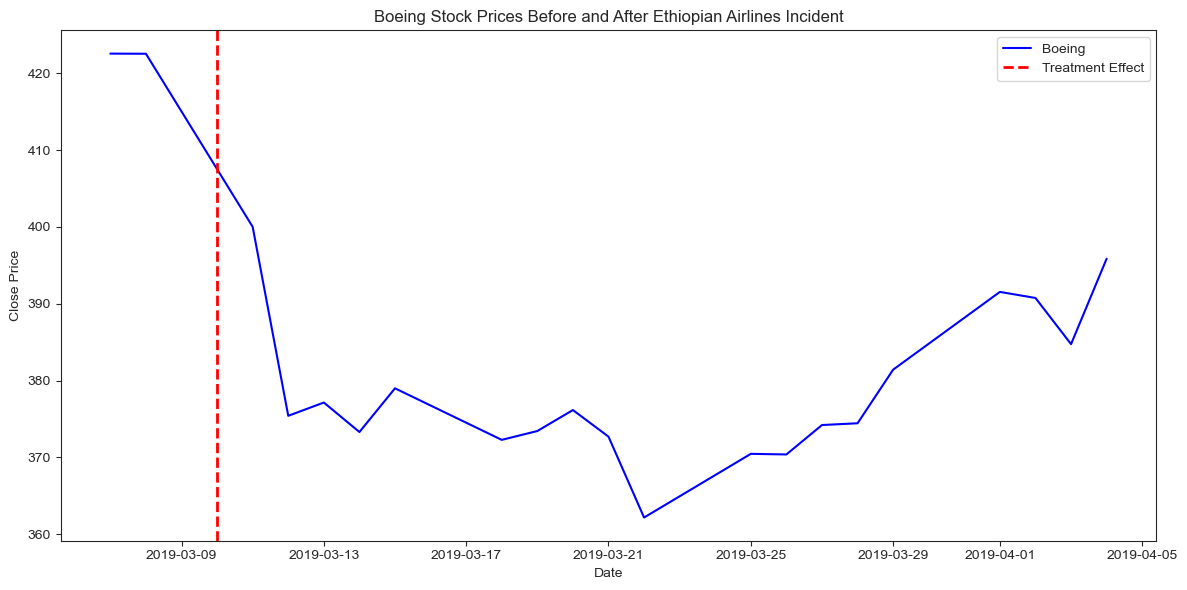

In [ ]:
# Define start and end dates
start_date_reg = '2019-03-07'  # Expanded start date
end_date_reg = '2019-04-5'    # Expanded end date

# Retrieve data for the expanded period
boeing_reg = yf.download(tickers="BA", start=start_date_reg, end=end_date_reg)
boeing_reg.name = 'Boeing'
boeing_reg.reset_index(inplace=True)

# Filter data for the incident date and 30 days after
incident_date = '2019-03-10'  # Incident date
end_date_post_incident = pd.to_datetime(incident_date) + pd.Timedelta(days=30)  # 30 days after incident

boeing_filtered = boeing_reg[(boeing_reg['Date'] >= incident_date) & (boeing_reg['Date'] <= end_date_post_incident)]

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("ticks")

# Plot Boeing stock prices
sns.lineplot(data=boeing_reg, x="Date", y="Close", color='blue', label="Boeing")

# Plot vertical line for incident date
plt.axvline(x=pd.to_datetime(incident_date), color='red', linestyle='--', linewidth=2, label="Treatment Effect")

# Set plot title and labels
plt.title("Boeing Stock Prices Before and After Ethiopian Airlines Incident")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


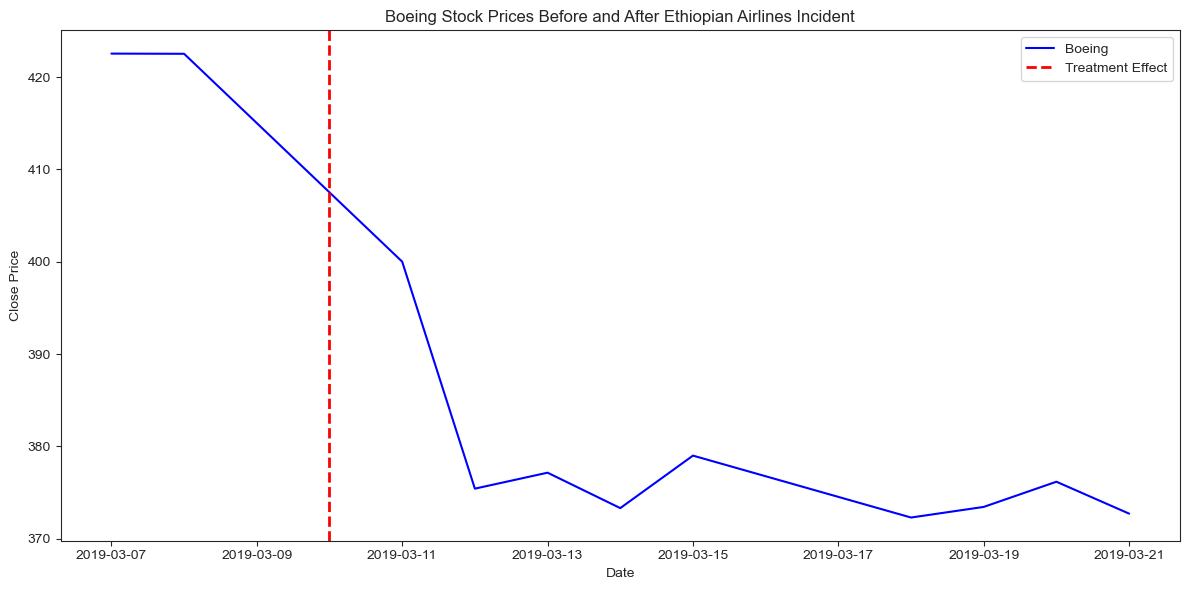

Negative effect of the treatment lasted until: 11 days after the incident.


In [ ]:
# Define start and end dates
start_date_reg = '2019-03-07'  # Expanded start date
end_date_reg = '2019-03-22'    # Expanded end date

# Retrieve data for the expanded period
boeing_reg = yf.download(tickers="BA", start=start_date_reg, end=end_date_reg)
boeing_reg.name = 'Boeing'
boeing_reg.reset_index(inplace=True)

# Filter data for the incident date and 30 days after
incident_date = '2019-03-10'  # Incident date
end_date_post_incident = pd.to_datetime(incident_date) + pd.Timedelta(days=30)  # 30 days after incident

boeing_filtered = boeing_reg[(boeing_reg['Date'] >= incident_date) & (boeing_reg['Date'] <= end_date_post_incident)]

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("ticks")

# Plot Boeing stock prices
sns.lineplot(data=boeing_reg, x="Date", y="Close", color='blue', label="Boeing")

# Plot vertical line for incident date
plt.axvline(x=pd.to_datetime(incident_date), color='red', linestyle='--', linewidth=2, label="Treatment Effect")

# Set plot title and labels
plt.title("Boeing Stock Prices Before and After Ethiopian Airlines Incident")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Calculate the period until which the negative effect of the treatment lasted
negative_effect_period = boeing_filtered['Date'].max() - pd.to_datetime(incident_date)
print("Negative effect of the treatment lasted until:", negative_effect_period.days, "days after the incident.")


## Orders and Deliveries

### 737 Model Orders and Cancellations

In [ ]:
annual_orders = pd.read_excel(excel_file, sheet_name = "Boeing_annual_orders")
annual_orders.head()

,Years,Type,737,747,767,777,787,Total
0,2023,Gross Orders ¹,987,NaN,30,126,313,1456
1,2023,Net in year of cancel ²,883,NaN,30,100,301,1314
2,2023,Net in year of order ³,987,NaN,30,126,313,1456
3,2022,Gross Orders ¹,697,NaN,31,68,139,935
4,2022,Net in year of cancel ²,561,NaN,31,68,114,774


In [ ]:
annual_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Years     54 non-null     int64  
 1   Type      54 non-null     object 
 2   737       54 non-null     int64  
 3   747       45 non-null     float64
 4   767       54 non-null     int64  
 5   777       54 non-null     int64  
 6   787       54 non-null     int64  
 7   Total     54 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 3.5+ KB


In [ ]:
boeing_737 = annual_orders.drop(columns=['747', '767', '777', '787'])
boeing_737.head()

,Years,Type,737,Total
0,2023,Gross Orders ¹,987,1456
1,2023,Net in year of cancel ²,883,1314
2,2023,Net in year of order ³,987,1456
3,2022,Gross Orders ¹,697,935
4,2022,Net in year of cancel ²,561,774


In [ ]:
boeing_737_new = boeing_737.iloc[:, :-1]

In [ ]:
boeing_737_new.head()

,Years,Type,737
0,2023,Gross Orders ¹,987
1,2023,Net in year of cancel ²,883
2,2023,Net in year of order ³,987
3,2022,Gross Orders ¹,697
4,2022,Net in year of cancel ²,561


In [ ]:
# Filter the DataFrame to include only 'Gross Orders ¹' and 'Net in year of cancel ²' types
filtered_data = boeing_737_new[(boeing_737_new['Type'] == 'Gross Orders ¹') | (boeing_737_new['Type'] == 'Net in year of cancel ²')]

# Pivot the DataFrame to have 'Years' as the index and 'Type' as columns
pivot_data = filtered_data.pivot(index='Years', columns='Type', values='737')

In [ ]:
filtered_data.head()

,Years,Type,737
0,2023,Gross Orders ¹,987
1,2023,Net in year of cancel ²,883
3,2022,Gross Orders ¹,697
4,2022,Net in year of cancel ²,561
6,2021,Gross Orders ¹,765


In [ ]:
pivot_data

Type,Gross Orders ¹,Net in year of cancel ²
Years,,
2006,733,729
2007,850,846
2008,488,484
2009,197,178
2010,508,486
2011,625,551
2012,1184,1124
2013,1208,1046
2014,1196,1104


In [ ]:
# Filter rows with Gross Orders or Net in year of cancel
filtered_df = boeing_737_new[
    (boeing_737_new['Type'] == 'Gross Orders ¹') |
    (boeing_737_new['Type'] == 'Net in year of cancel ²')
]

# Initialize an empty list to store the new rows
rows = []

# Iterate over each unique year
for year in filtered_df['Years'].unique():
    # Filter data for the current year
    year_data = filtered_df[filtered_df['Years'] == year]

    # Calculate cancellations for the current year
    cancellations = (
        year_data.loc[year_data['Type'] == 'Gross Orders ¹', '737'].values -
        year_data.loc[year_data['Type'] == 'Net in year of cancel ²', '737'].values
    )

    # Create a new row for cancellations
    cancellations_row = {
        'Years': year,
        'Type': 'Cancellations',
        '737': cancellations[0]  # Assuming there's only one value
    }

    # Add the cancellations row to the list
    rows.append(cancellations_row)

# Create a DataFrame from the list of new rows
cancellations_df = pd.DataFrame(rows)

# Concatenate the original filtered DataFrame with the new cancellations DataFrame
filtered_df = pd.concat([filtered_df, cancellations_df], ignore_index=True)

# Print the updated DataFrame
print(filtered_df)

# Store the final result
boeing_737_cancel = filtered_df

    Years                     Type   737
0    2023           Gross Orders ¹   987
1    2023  Net in year of cancel ²   883
2    2022           Gross Orders ¹   697
3    2022  Net in year of cancel ²   561
4    2021           Gross Orders ¹   765
5    2021  Net in year of cancel ²   370
6    2020           Gross Orders ¹   130
7    2020  Net in year of cancel ²  -511
8    2019           Gross Orders ¹    69
9    2019  Net in year of cancel ²   -51
10   2018           Gross Orders ¹   837
11   2018  Net in year of cancel ²   675
12   2017           Gross Orders ¹   865
13   2017  Net in year of cancel ²   745
14   2016           Gross Orders ¹   701
15   2016  Net in year of cancel ²   550
16   2015           Gross Orders ¹   666
17   2015  Net in year of cancel ²   588
18   2014           Gross Orders ¹  1196
19   2014  Net in year of cancel ²  1104
20   2013           Gross Orders ¹  1208
21   2013  Net in year of cancel ²  1046
22   2012           Gross Orders ¹  1184
23   2012  Net i

In [ ]:
boeing_737_cancel.head()

,Years,Type,737
0,2023,Gross Orders ¹,987
1,2023,Net in year of cancel ²,883
2,2022,Gross Orders ¹,697
3,2022,Net in year of cancel ²,561
4,2021,Gross Orders ¹,765


In [ ]:
filtered_df.groupby('Type').sum()

,Years,737
Type,,
Cancellations,36261,2348
Gross Orders ¹,36261,12706
Net in year of cancel ²,36261,10358


In [ ]:
# Filter the DataFrame to include only 'Gross Orders ¹' and 'Net in year of cancel ²' types
filtered_data = boeing_737_cancel[(boeing_737_cancel['Type'] == 'Gross Orders ¹') | (boeing_737_cancel['Type'] == 'Cancellations')]

# Pivot the DataFrame to have 'Years' as the index and 'Type' as columns
pivot_data = filtered_data.pivot(index='Years', columns='Type', values='737')
boeing_cancel_737 = pivot_data
boeing_cancel_737

Type,Cancellations,Gross Orders ¹
Years,,
2006,4,733
2007,4,850
2008,4,488
2009,19,197
2010,22,508
2011,74,625
2012,60,1184
2013,162,1208
2014,92,1196


In [ ]:
pivot_data = pivot_data.iloc[8:]
pivot_data

Type,Cancellations,Gross Orders ¹
Years,,
2014,92,1196
2015,78,666
2016,151,701
2017,120,865
2018,162,837
2019,120,69
2020,641,130
2021,395,765
2022,136,697


In [ ]:
filtered_df.groupby('Type').sum()

,Years,737
Type,,
Cancellations,36261,2348
Gross Orders ¹,36261,12706
Net in year of cancel ²,36261,10358


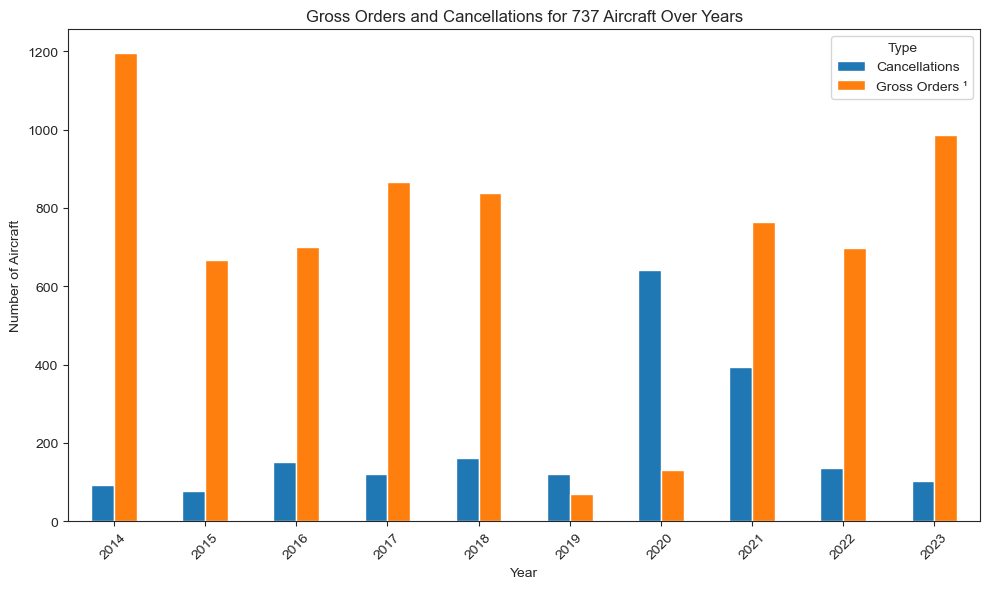

In [ ]:
# Plot the data
pivot_data.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Aircraft')
plt.title('Gross Orders and Cancellations for 737 Aircraft Over Years')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

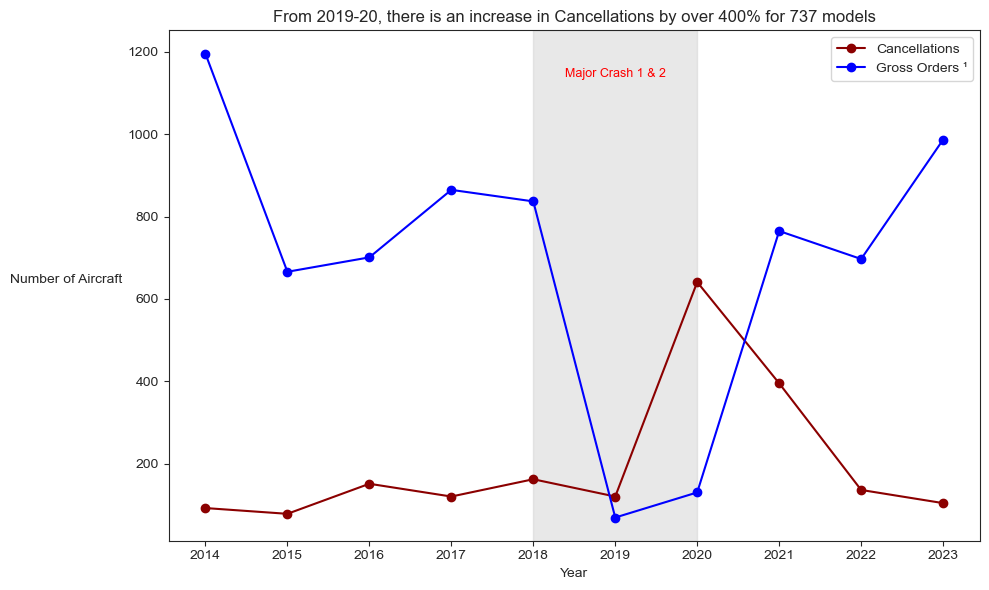

In [ ]:
# Plot the data
pivot_data.plot(kind='line', figsize=(10, 6), marker='o', color=['darkred', 'blue'])

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Aircraft', rotation=0, ha='right')
plt.title('From 2019-20, there is an increase in Cancellations by over 400% for 737 models')
plt.xticks(range(2014, 2024))  # Setting x-tickers from 2015 to 2022
plt.legend()

# Shade the grey between 2018 and 2020
plt.axvspan(2018, 2020, color='lightgrey', alpha=0.5)
# Annotate the grey region
plt.annotate('Major Crash 1 & 2', xy=(2019, 1160), xytext=(2019, 1160),
             fontsize=9, ha='center', va='top', color='red')

plt.tight_layout()
# plt.savefig('plot1.png', dpi=300)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


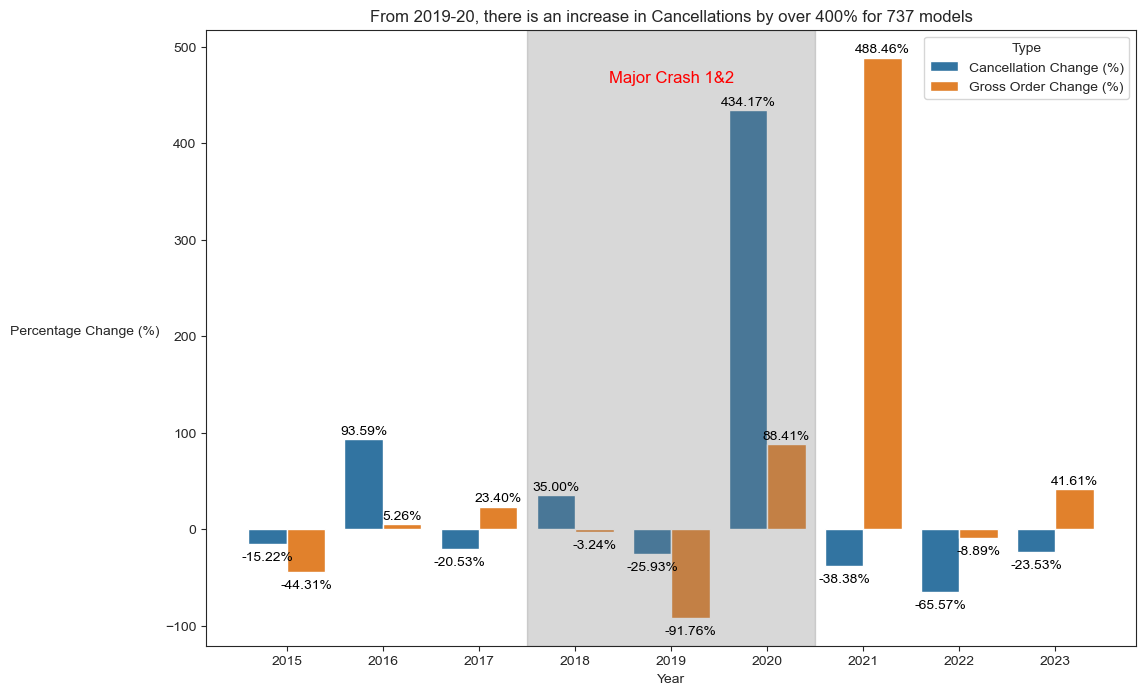

In [ ]:
# Data for Cancellations and Gross Orders
data = {
    'Years': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Cancellations': [92, 78, 151, 120, 162, 120, 641, 395, 136, 104],
    'Gross Orders': [1196, 666, 701, 865, 837, 69, 130, 765, 697, 987]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate year-over-year percentage changes for both metrics
df['Cancellation Change (%)'] = df['Cancellations'].pct_change() * 100
df['Gross Order Change (%)'] = df['Gross Orders'].pct_change() * 100

# Create a DataFrame for the percentage changes
df_changes = pd.melt(
    df[['Years', 'Cancellation Change (%)', 'Gross Order Change (%)']],
    id_vars=['Years'],
    var_name='Type',
    value_name='Percentage Change'
)

# Create a bar plot with Seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Years', y='Percentage Change', hue='Type', data=df_changes)

# Annotate each bar with the percentage change value
for bar in bar_plot.patches:
    # Position the annotation at the top of each bar
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    percentage_text = f'{bar_y:.2f}%'
    vertical_offset = -20 if bar_y < 0 else 2  # Adjust annotation for negative and positive values
    plt.text(bar_x, bar_y + vertical_offset, percentage_text, ha='center', va='bottom', color='black')

# Add shaded area between 2018 and 2020
# Assuming 'Years' is an index of bar centers, find x-coordinates for 2018-2020
year_positions = df_changes['Years'].unique()  # Unique years for x-ticks
year_indices = {year: i for i, year in enumerate(year_positions)}

# Use axvspan to shade the region between 2018 and 2020
plt.axvspan(
    year_indices[2018] - 0.5,
    year_indices[2020] + 0.5,
    color='gray',
    alpha=0.3,
    label='Major Crash 1&2'
)

# Add annotation for the shaded area
plt.text(
    (year_indices[2018] + year_indices[2020]) / 2,
    475,  # Position annotation slightly below the x-axis
    "Major Crash 1&2",
    ha='center',
    va='top',
    fontsize=12,
    color='red'
)

# 'Major Crash 1 & 2', xy=(2019, 1160), xytext=(2019, 1160),
#              fontsize=9, ha='center', va='top', color='red'


# Plot title and axis labels
plt.title('From 2019-20, there is an increase in Cancellations by over 400% for 737 models')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)', rotation=0, ha='right')

# Display the plot
plt.show()


In [ ]:
df_737 = df.drop(columns=['Cancellation Change (%)', 'Gross Order Change (%)'])

In [ ]:
df_737

,Years,Cancellations,Gross Orders
0,2014,92,1196
1,2015,78,666
2,2016,151,701
3,2017,120,865
4,2018,162,837
5,2019,120,69
6,2020,641,130
7,2021,395,765
8,2022,136,697
9,2023,104,987


### Boeing All Orders

In [ ]:
annual_orders_all = pd.read_excel(excel_file, sheet_name = "Boeing_annual_orders")

In [ ]:
annual_orders_all = annual_orders.iloc[:, :-1]
annual_orders_all['Total'] = annual_orders_all.iloc[:, 2:].sum(axis=1).astype(int)
annual_orders_total = annual_orders_all.drop(columns=['737','747', '767', '777', '787'])
annual_orders_total.head()

,Years,Type,Total
0,2023,Gross Orders ¹,1456
1,2023,Net in year of cancel ²,1314
2,2023,Net in year of order ³,1456
3,2022,Gross Orders ¹,935
4,2022,Net in year of cancel ²,774


In [ ]:
# Filter rows with Gross Orders or Net in year of cancel
filtered_df = annual_orders_total[
    (annual_orders_total['Type'] == 'Gross Orders ¹') |
    (annual_orders_total['Type'] == 'Net in year of cancel ²')
]

# Initialize an empty list to store the new rows
rows = []

# Iterate over each unique year
for year in filtered_df['Years'].unique():
    # Filter data for the current year
    year_data = filtered_df[filtered_df['Years'] == year]

    # Calculate cancellations for the current year
    cancellations = (
        year_data.loc[year_data['Type'] == 'Gross Orders ¹', 'Total'].values -
        year_data.loc[year_data['Type'] == 'Net in year of cancel ²', 'Total'].values
    )

    # Create a new row for cancellations
    cancellations_row = {
        'Years': year,
        'Type': 'Cancellations',
        'Total': cancellations[0]  # Assuming one row for each year
    }

    # Add the cancellations row to the list
    rows.append(cancellations_row)

# Create a DataFrame from the list of new rows
cancellations_df = pd.DataFrame(rows)

# Use concat to append the new rows to filtered_df
filtered_df = pd.concat([filtered_df, cancellations_df], ignore_index=True)

# Output the result
print(filtered_df)

# Store the final result
annual_orders_total_cancel = filtered_df

    Years                     Type  Total
0    2023           Gross Orders ¹   1456
1    2023  Net in year of cancel ²   1314
2    2022           Gross Orders ¹    935
3    2022  Net in year of cancel ²    774
4    2021           Gross Orders ¹    909
5    2021  Net in year of cancel ²    479
6    2020           Gross Orders ¹    184
7    2020  Net in year of cancel ²   -471
8    2019           Gross Orders ¹    246
9    2019  Net in year of cancel ²     54
10   2018           Gross Orders ¹   1090
11   2018  Net in year of cancel ²    893
12   2017           Gross Orders ¹   1053
13   2017  Net in year of cancel ²    912
14   2016           Gross Orders ¹    848
15   2016  Net in year of cancel ²    668
16   2015           Gross Orders ¹    878
17   2015  Net in year of cancel ²    768
18   2014           Gross Orders ¹   1550
19   2014  Net in year of cancel ²   1432
20   2013           Gross Orders ¹   1531
21   2013  Net in year of cancel ²   1355
22   2012           Gross Orders ¹

In [ ]:
# Filter the DataFrame to include only 'Gross Orders ¹' and 'Net in year of cancel ²' types
filtered_data = annual_orders_total_cancel[(annual_orders_total_cancel['Type'] == 'Gross Orders ¹') | (annual_orders_total_cancel['Type'] == 'Cancellations')]

# Pivot the DataFrame to have 'Years' as the index and 'Type' as columns
pivot_data = filtered_data.pivot(index='Years', columns='Type', values='Total')

In [ ]:
pivot_data

Type,Cancellations,Gross Orders ¹
Years,,
2006,6,1050
2007,10,1423
2008,7,669
2009,121,263
2010,95,625
2011,116,921
2012,136,1339
2013,176,1531
2014,118,1550


In [ ]:
pivot_data = pivot_data.iloc[8:]
pivot_data

Type,Cancellations,Gross Orders ¹
Years,,
2014,118,1550
2015,110,878
2016,180,848
2017,141,1053
2018,197,1090
2019,192,246
2020,655,184
2021,430,909
2022,161,935


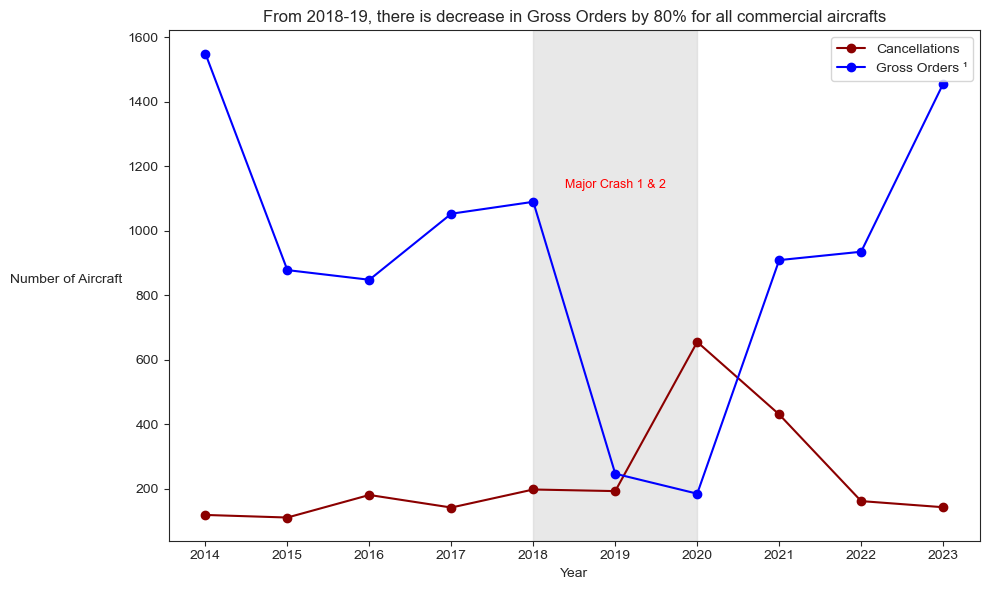

In [ ]:
# Plot the data
pivot_data.plot(kind='line', figsize=(10, 6), marker='o', color=['darkred', 'blue'])

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Aircraft', rotation=0, ha='right')
plt.title('From 2018-19, there is decrease in Gross Orders by 80% for all commercial aircrafts')
plt.xticks(range(2014, 2024))  # Setting x-tickers from 2015 to 2022
plt.legend()

# Shade the grey between 2018 and 2020
plt.axvspan(2018, 2020, color='lightgrey', alpha=0.5)
# Annotate the grey region
plt.annotate('Major Crash 1 & 2', xy=(2019, 1160), xytext=(2019, 1160),
             fontsize=9, ha='center', va='top', color='red')

plt.tight_layout()
# plt.savefig('plot1.png', dpi=300)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


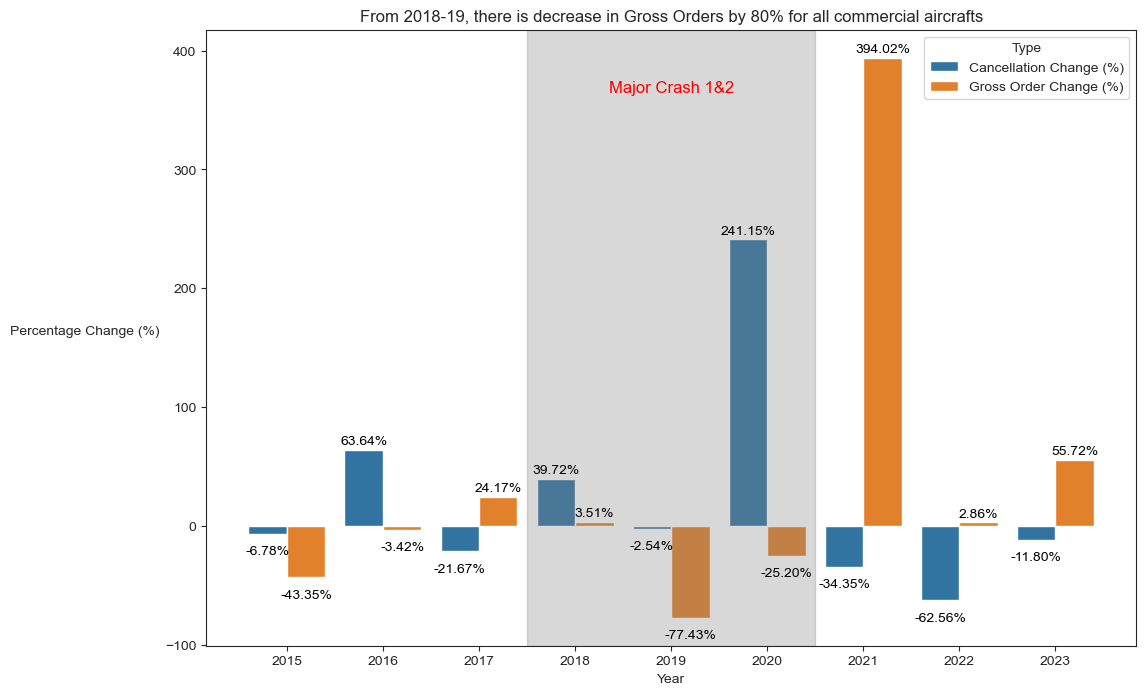

In [ ]:
data = {
    'Years': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Cancellations': [118, 110, 180, 141, 197, 192, 655, 430, 161, 142],
    'Gross Orders': [1550, 878, 848, 1053, 1090, 246, 184, 909, 935, 1456]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate year-over-year percentage changes for both metrics
df['Cancellation Change (%)'] = df['Cancellations'].pct_change() * 100
df['Gross Order Change (%)'] = df['Gross Orders'].pct_change() * 100

# Create a DataFrame for the percentage changes
df_changes = pd.melt(
    df[['Years', 'Cancellation Change (%)', 'Gross Order Change (%)']],
    id_vars=['Years'],
    var_name='Type',
    value_name='Percentage Change'
)

# Create a bar plot with Seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Years', y='Percentage Change', hue='Type', data=df_changes)

# Annotate each bar with the percentage change value
for bar in bar_plot.patches:
    # Position the annotation at the top of each bar
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    percentage_text = f'{bar_y:.2f}%'
    vertical_offset = -20 if bar_y < 0 else 2  # Adjust annotation for negative and positive values
    plt.text(bar_x, bar_y + vertical_offset, percentage_text, ha='center', va='bottom', color='black')

# Add shaded area between 2018 and 2020
# Get the index positions for the shading
year_positions = df_changes['Years'].unique()  # Unique years for x-ticks
year_indices = {year: i for i, year in enumerate(year_positions)}

# Use axvspan to shade the region between 2018 and 2020
plt.axvspan(
    year_indices[2018] - 0.5,
    year_indices[2020] + 0.5,
    color='gray',
    alpha=0.3,
    label='Major Crash 1&2'
)

# Annotate the shaded area with a label
plt.text(
    (year_indices[2018] + year_indices[2020]) / 2,
    375,  # Position annotation below the x-axis
    "Major Crash 1&2",
    ha='center',
    va='top',
    fontsize=12,
    color='red'
)

# Plot title and axis labels
plt.title('From 2018-19, there is decrease in Gross Orders by 80% for all commercial aircrafts')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)', rotation=0, ha='right')

# Display the plot
plt.show()

In [ ]:
df_total = df.drop(columns=['Gross Order Change (%)', 'Cancellation Change (%)'])

In [ ]:
df_total

,Years,Cancellations,Gross Orders
0,2014,118,1550
1,2015,110,878
2,2016,180,848
3,2017,141,1053
4,2018,197,1090
5,2019,192,246
6,2020,655,184
7,2021,430,909
8,2022,161,935
9,2023,142,1456


### Compare Total and 737 Orders and Cancellations

In [ ]:
# Merge the DataFrames on "Years"
df_combined = pd.merge(df_total, df_737, on='Years')

# Display the combined DataFrame
print(df_combined)


   Years  Cancellations_x  Gross Orders_x  Cancellations_y  Gross Orders_y
0   2014              118            1550               92            1196
1   2015              110             878               78             666
2   2016              180             848              151             701
3   2017              141            1053              120             865
4   2018              197            1090              162             837
5   2019              192             246              120              69
6   2020              655             184              641             130
7   2021              430             909              395             765
8   2022              161             935              136             697
9   2023              142            1456              104             987


In [ ]:
# Rename the columns
df_renamed = df_combined.rename(columns={
    'Cancellations_x': 'Total Cancellations',
    'Gross Orders_x': 'Total Gross Orders',
    'Cancellations_y': '737 Cancellations',
    'Gross Orders_y': '737 Gross Orders'
})


df_renamed

,Years,Total Cancellations,Total Gross Orders,737 Cancellations,737 Gross Orders
0,2014,118,1550,92,1196
1,2015,110,878,78,666
2,2016,180,848,151,701
3,2017,141,1053,120,865
4,2018,197,1090,162,837
5,2019,192,246,120,69
6,2020,655,184,641,130
7,2021,430,909,395,765
8,2022,161,935,136,697
9,2023,142,1456,104,987


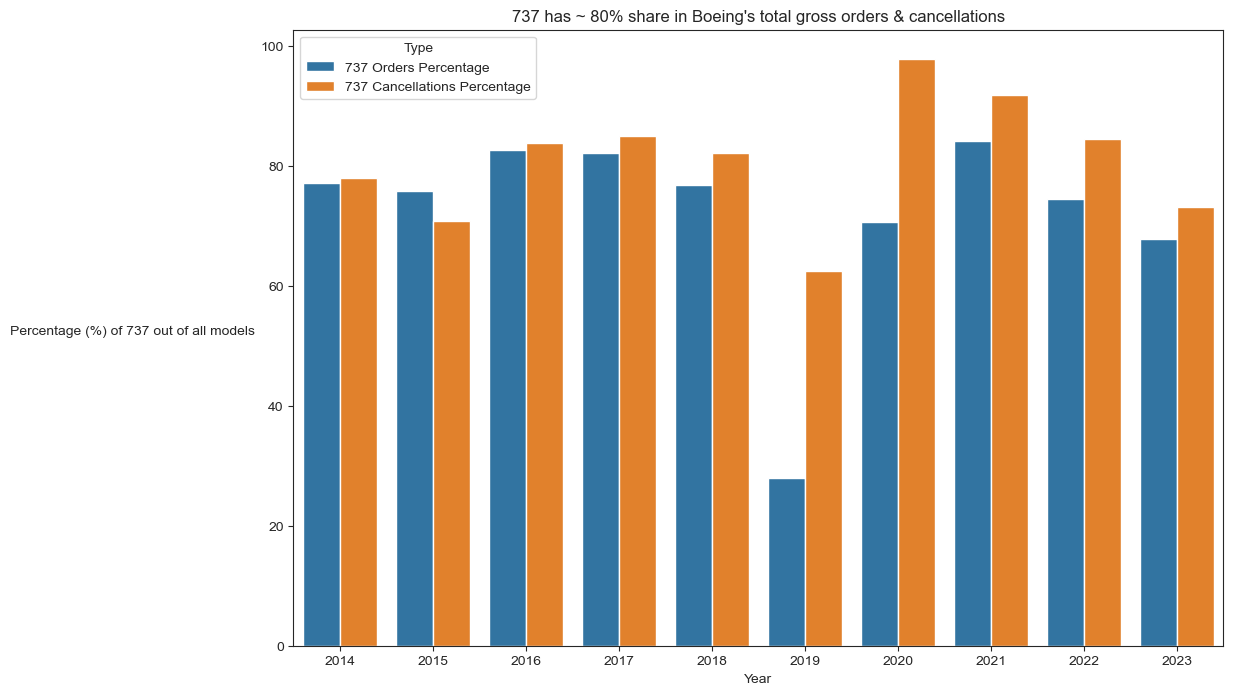

In [ ]:
df = df_renamed

# Calculate the percentage of 737 orders and cancellations relative to the total
df['737 Orders Percentage'] = (df['737 Gross Orders'] / df['Total Gross Orders']) * 100
df['737 Cancellations Percentage'] = (df['737 Cancellations'] / df['Total Cancellations']) * 100

# Create a DataFrame for the percentages to plot
df_plot = pd.melt(
    df[['Years', '737 Orders Percentage', '737 Cancellations Percentage']],
    id_vars=['Years'],
    var_name='Type',
    value_name='Percentage'
)

# Create a bar plot with two sets of bars (using hue)
plt.figure(figsize=(12, 8))
sns.barplot(x='Years', y='Percentage', hue='Type', data=df_plot)

# Set plot title and axis labels
plt.title('737 has ~ 80% share in Boeing\'s total gross orders & cancellations')
plt.xlabel('Year')
plt.ylabel('Percentage (%) of 737 out of all models', rotation=0, ha='right')

# Display the plot
plt.show()

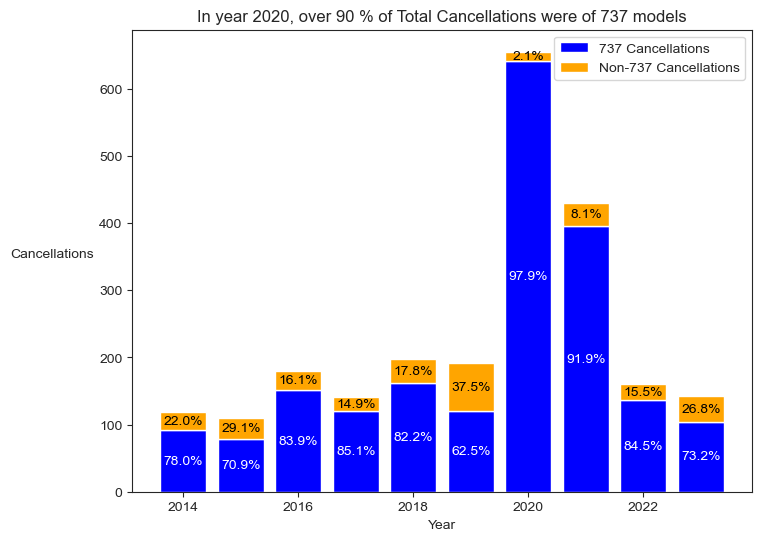

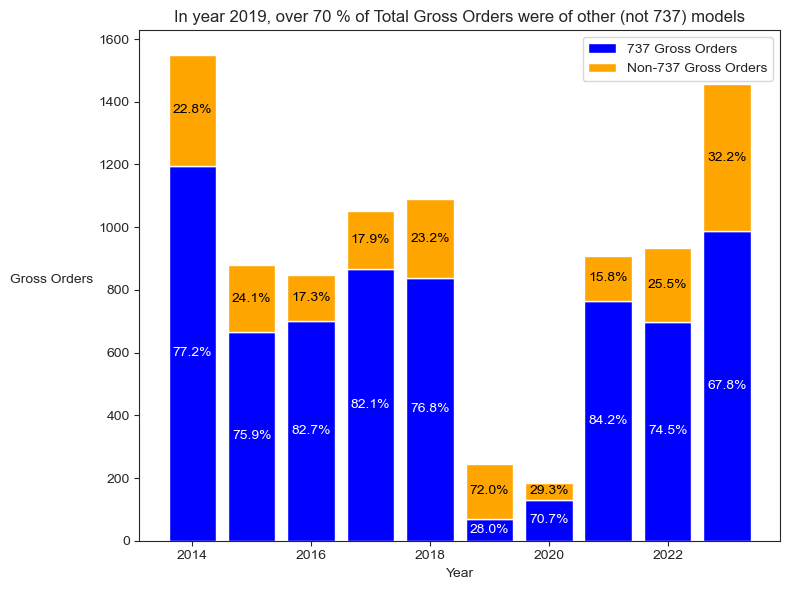

In [ ]:
# Calculate Non-737 Cancellations and Gross Orders
df["Non-737 Cancellations"] = df["Total Cancellations"] - df["737 Cancellations"]
df["Non-737 Gross Orders"] = df["Total Gross Orders"] - df["737 Gross Orders"]

# Create a separate figure for cancellations
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Stacked bar for cancellations
ax1.bar(df["Years"], df["737 Cancellations"], label='737 Cancellations', color='blue')
ax1.bar(df["Years"], df["Non-737 Cancellations"], bottom=df["737 Cancellations"], label='Non-737 Cancellations', color='orange')

# Add percentage annotations for cancellations
for i, year in enumerate(df["Years"]):
    total_cancellations = df["Total Cancellations"][i]
    perc_737 = (df["737 Cancellations"][i] / total_cancellations) * 100
    perc_non_737 = (df["Non-737 Cancellations"][i] / total_cancellations) * 100

    ax1.text(year, df["737 Cancellations"][i] / 2, f"{perc_737:.1f}%", ha='center', va='center', color='white')
    ax1.text(year, df["737 Cancellations"][i] + (df["Non-737 Cancellations"][i] / 2), f"{perc_non_737:.1f}%", ha='center', va='center', color='black')

ax1.set_title('In year 2020, over 90 % of Total Cancellations were of 737 models')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cancellations', rotation=0, ha='right')
ax1.legend()

# Create a separate figure for gross orders
fig2, ax2 = plt.subplots(figsize=(8, 6))

# Stacked bar for gross orders
ax2.bar(df["Years"], df["737 Gross Orders"], label='737 Gross Orders', color='blue')
ax2.bar(df["Years"], df["Non-737 Gross Orders"], bottom=df["737 Gross Orders"], label='Non-737 Gross Orders', color='orange')

# Add percentage annotations for gross orders
for i, year in enumerate(df["Years"]):
    total_gross_orders = df["Total Gross Orders"][i]
    perc_737 = (df["737 Gross Orders"][i] / total_gross_orders) * 100
    perc_non_737 = (df["Non-737 Gross Orders"][i] / total_gross_orders) * 100

    ax2.text(year, df["737 Gross Orders"][i] / 2, f"{perc_737:.1f}%", ha='center', va='center', color='white')
    ax2.text(year, df["737 Gross Orders"][i] + (df["Non-737 Gross Orders"][i] / 2), f"{perc_non_737:.1f}%", ha='center', va='center', color='black')

ax2.set_title('In year 2019, over 70 % of Total Gross Orders were of other (not 737) models')
ax2.set_xlabel('Year')
ax2.set_ylabel('Gross Orders', rotation=0, ha='right')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Sentiment Analysis
## Import Data & Merge


### Crash 1

In [4]:
pd.set_option('display.max_columns', 100)
excel_file = "merged_data.xlsx"
crash1 = pd.read_excel(excel_file, sheet_name = "crash1_cleaned")  #, encoding='ISO-8859-1'
crash1.head()

,Headline,Date,Source,Text,Type,Incident
0,Lion Air: Why did a brand-new Boeing jet crash...,2018-10-31,CNN,CNN' ''The plane behind Lion Air's crash off I...,News,Lion Air
1,Lion Air plane crashes in Indonesia,2018-10-31,CNN,What we know'The flight: Lion Air flight 610 d...,News,Lion Air
2,Lion Air crash: No answers as to cause of jet ...,2018-10-30,CNN,Jakarta'CNN' ''A day after Indonesian Lion Air...,News,Lion Air
3,"Lion Air jet one of Boeing's newest, most-adva...",2018-10-31,CNN,CNN' ''The Lion Air jet in Monday's crash off ...,News,Lion Air
4,Lion Air Crash Puts Boeing's Popular 737 Max i...,2018-10-29,Wall Street Journal,By ''Andrew Tangel'' and ''Robert Wall''Oct. 2...,News,Lion Air


In [5]:
pattern = re.compile(r'[^A-Za-z0-9.,\'"\s-]')

# Remove the specified patterns from the 'Text'
crash1['Text'] = crash1['Text'].apply(lambda x: pattern.sub(' ', x))

# Remove the specified patterns from the 'Headline'
crash1['Headline'] = crash1['Headline'].apply(lambda x: pattern.sub(' ', x))
crash1.dtypes

Headline            object
Date        datetime64[ns]
Source              object
Text                object
Type                object
Incident            object
dtype: object

In [6]:
crash1['Date'] = pd.to_datetime(crash1['Date'])

#Run cell twice for second line
crash1['Date'] = pd.to_datetime(crash1['Date'], format='%Y-%m-%d')
crash1.shape

(45, 6)

In [7]:
#Add Incident column
crash1['Incident'] = 'Lion Air'
crash1.head(50)

,Headline,Date,Source,Text,Type,Incident
0,Lion Air Why did a brand-new Boeing jet crash...,2018-10-31,CNN,CNN' ''The plane behind Lion Air's crash off I...,News,Lion Air
1,Lion Air plane crashes in Indonesia,2018-10-31,CNN,What we know'The flight Lion Air flight 610 d...,News,Lion Air
2,Lion Air crash No answers as to cause of jet ...,2018-10-30,CNN,Jakarta'CNN' ''A day after Indonesian Lion Air...,News,Lion Air
3,"Lion Air jet one of Boeing's newest, most-adva...",2018-10-31,CNN,CNN' ''The Lion Air jet in Monday's crash off ...,News,Lion Air
4,Lion Air Crash Puts Boeing's Popular 737 Max i...,2018-10-29,Wall Street Journal,By ''Andrew Tangel'' and ''Robert Wall''Oct. 2...,News,Lion Air
5,Indonesian Plane With 189 People on Board Cras...,2018-10-29,Wall Street Journal,By ''Ben Otto'' and ''Gaurav Raghuvanshi''Upda...,News,Lion Air
6,Indonesia Plane Crash Adds to Country's Troubl...,2018-10-28,NY times,"JAKARTA, Indonesia A jetliner carrying 189 p...",News,Lion Air
7,Indonesia Plane Crash Leaves Experts Puzzled,2018-10-30,NY times,BANGKOK The weather over the Indonesian capi...,News,Lion Air
8,Divers Zero In on Black Boxes From Indonesia P...,2018-10-31,NY times,BANGKOK Enticed by faint pings from the seaf...,News,Lion Air
9,Lion Air Boeing 737 Max 8 Crashes into Java Sea,2018-10-29,AIN,"By GREGORY POLEK Senior Editor'October 29, 2...",News,Lion Air


### Crash 2

In [210]:
crash2 = pd.read_excel(excel_file, sheet_name = "crash2_cleaned")
crash2.head()

,Headline,Date,Source,Text,Type,Incident
0,Boeing Statement on Atlas Air 767 Cargo Airpla...,2019-02-23,Boeing,Boeing is deeply saddened to learn of the acci...,Company,Ethiopian Airlines
1,Boeing Statement on Atlas Air 767 Cargo Airpla...,2019-02-23,Boeing,Boeing is deeply saddened to learn of the acci...,Company,Ethiopian Airlines
2,Updated: Boeing Statement on Atlas Air 767 Car...,2019-02-24,Boeing,Boeing is deeply saddened to learn of the pass...,Company,Ethiopian Airlines
3,Atlas Air 767 Entered Steep Dive Before Impact...,2019-02-25,AIN,National Transportation Safety Board (NTSB) Ch...,News,Ethiopian Airlines
4,Cambodia Weighs Commitment To Cape Town Conven...,2019-02-25,AIN,Cambodia is moving toward strengthening its le...,News,Ethiopian Airlines


In [211]:
crash2.isna().sum()

Headline    0
Date        0
Source      0
Text        0
Type        0
Incident    0
dtype: int64

In [212]:
crash2.dtypes

Headline            object
Date        datetime64[ns]
Source              object
Text                object
Type                object
Incident            object
dtype: object

In [213]:
crash2.shape

(140, 6)

In [214]:
crash2['Date'] = pd.to_datetime(crash2['Date'])
crash2['Date'] = pd.to_datetime(crash2['Date'], format='%Y-%m-%d')

#Add Incident column
crash2['Incident'] = 'Ethiopian Airlines'
crash2.head()

,Headline,Date,Source,Text,Type,Incident
0,Boeing Statement on Atlas Air 767 Cargo Airpla...,2019-02-23,Boeing,Boeing is deeply saddened to learn of the acci...,Company,Ethiopian Airlines
1,Boeing Statement on Atlas Air 767 Cargo Airpla...,2019-02-23,Boeing,Boeing is deeply saddened to learn of the acci...,Company,Ethiopian Airlines
2,Updated: Boeing Statement on Atlas Air 767 Car...,2019-02-24,Boeing,Boeing is deeply saddened to learn of the pass...,Company,Ethiopian Airlines
3,Atlas Air 767 Entered Steep Dive Before Impact...,2019-02-25,AIN,National Transportation Safety Board (NTSB) Ch...,News,Ethiopian Airlines
4,Cambodia Weighs Commitment To Cape Town Conven...,2019-02-25,AIN,Cambodia is moving toward strengthening its le...,News,Ethiopian Airlines


### Crash 3

In [13]:
crash3 = pd.read_excel(excel_file, sheet_name = "crash3_cleaned")
crash3 = crash3.dropna()
crash3['Date'] = pd.to_datetime(crash3['Date'])
crash3['Date'] = pd.to_datetime(crash3['Date'], format='%Y-%m-%d')
crash3.shape

(61, 6)

In [14]:
crash3['Text'] = crash3['Text'].str.replace('\\n', ' ')
crash3['Text'] = crash3['Text'].str.replace('\n', ' ')

In [15]:
pattern = re.compile(r'[^A-Za-z0-9\s.,\'"()-]')


# Remove the specified patterns from the 'Headline' and 'Text'
crash3['Text'] = crash3['Text'].apply(lambda x: pattern.sub(' ', x))
crash3['Headline'] = crash3['Headline'].apply(lambda x: pattern.sub(' ', x))

In [16]:
#Add Incident column
crash3['Incident'] = 'Alaska Airlines'
crash3.head()

,Headline,Date,Source,Text,Type,Incident
0,Should I change my flight New news on Boeing ...,2024-01-06,Reddit,Should I change my flight New news on Boeing ...,Social Media,Alaska Airlines
1,Boeing wants FAA to exempt MAX 7 from safety r...,2024-01-07,Reddit,Bullet Maggnet 2mo ago Boeing hoping fo...,Social Media,Alaska Airlines
2,Boeing Price ( ) Drop On Monday Jan. 8th 2024 ...,2024-01-07,Reddit,What percentage drop will happen tomorrow by c...,Social Media,Alaska Airlines
3,CNBC FAA orders grounding of dozens of Boein...,2024-01-07,Reddit,SmoothRollinPsycphrm 14d ago I just fle...,Social Media,Alaska Airlines
4,After the Alaska Airlines flight 1282 incident...,2024-01-06,Quora,Yes. The incident was due to improper assembly...,Social Media,Alaska Airlines


## Merge Data

In [215]:
merged_data = pd.concat([crash1, crash2, crash3], axis = 0)
merged_data.shape

(246, 6)

#### Creating subsetted dataframes

In [80]:
c1_public_b = merged_data[((merged_data['Type']=='News2') | (merged_data['Type']=='Social Media')) & (merged_data['Incident']=='Lion Air')]
c1_public_b = c1_public_b.copy()
c1_public_b.shape


(14, 6)

In [128]:
c1_public_a = merged_data[((merged_data['Type']=='News') | (merged_data['Type']=='Social Media')) & (merged_data['Incident']=='Lion Air')]
c1_public_a = c1_public_a.copy()
c1_public_a

,Headline,Date,Source,Text,Type,Incident
0,Lion Air Why did a brand-new Boeing jet crash...,2018-10-31,CNN,CNN' ''The plane behind Lion Air's crash off I...,News,Lion Air
1,Lion Air plane crashes in Indonesia,2018-10-31,CNN,What we know'The flight Lion Air flight 610 d...,News,Lion Air
2,Lion Air crash No answers as to cause of jet ...,2018-10-30,CNN,Jakarta'CNN' ''A day after Indonesian Lion Air...,News,Lion Air
3,"Lion Air jet one of Boeing's newest, most-adva...",2018-10-31,CNN,CNN' ''The Lion Air jet in Monday's crash off ...,News,Lion Air
4,Lion Air Crash Puts Boeing's Popular 737 Max i...,2018-10-29,Wall Street Journal,By ''Andrew Tangel'' and ''Robert Wall''Oct. 2...,News,Lion Air
5,Indonesian Plane With 189 People on Board Cras...,2018-10-29,Wall Street Journal,By ''Ben Otto'' and ''Gaurav Raghuvanshi''Upda...,News,Lion Air
6,Indonesia Plane Crash Adds to Country's Troubl...,2018-10-28,NY times,"JAKARTA, Indonesia A jetliner carrying 189 p...",News,Lion Air
7,Indonesia Plane Crash Leaves Experts Puzzled,2018-10-30,NY times,BANGKOK The weather over the Indonesian capi...,News,Lion Air
8,Divers Zero In on Black Boxes From Indonesia P...,2018-10-31,NY times,BANGKOK Enticed by faint pings from the seaf...,News,Lion Air
9,Lion Air Boeing 737 Max 8 Crashes into Java Sea,2018-10-29,AIN,"By GREGORY POLEK Senior Editor'October 29, 2...",News,Lion Air


In [218]:
c2_public_b = merged_data[((merged_data['Date'] >= '2019-03-07') & (merged_data['Date'] <= '2019-03-09')) & (merged_data['Type'].isin(['News', 'Social Media'])) & (merged_data['Incident'] == 'Ethiopian Airlines')]
c2_public_b.shape

(34, 6)

In [231]:
c2_public_a = merged_data[((merged_data['Date'] >= '2019-03-11') & (merged_data['Date'] <= '2019-03-13')) & (((merged_data['Type']=='News') | (merged_data['Type']=='Social Media'))) & (merged_data['Incident'] == 'Ethiopian Airlines')]
c2_public_a.shape

(43, 6)

In [161]:
c3_public_a = merged_data[(merged_data['Date'] >= '2024-01-06') & (merged_data['Date'] <= '2024-01-08') & (merged_data['Type'].isin(['News', 'Social Media'])) & (merged_data['Incident'] == 'Alaska Airlines')]
c3_public_a.shape

(27, 6)

In [162]:
c3_public_b = merged_data[(merged_data['Date'] >= '2024-01-02') & (merged_data['Date'] <= '2024-01-04') & (merged_data['Type'].isin(['News', 'Social Media'])) & (merged_data['Incident'] == 'Alaska Airlines')]
c3_public_b

,Headline,Date,Source,Text,Type,Incident
11,A loose bolt is the least of Boeing's problems...,2024-01-02,Yahoo finance,Boeing (BA) shares tick down Tuesday morning f...,News,Alaska Airlines
12,Bell-Boeing Secures Contract to Aid MV-22 Ospr...,2024-01-02,Yahoo Finance,"Bell-Boeing, a joint venture (JV) between The ...",News,Alaska Airlines
13,Airworthiness Directives The Most Important O...,2024-01-02,Simple Flying,"Throughout the year, aviation regulators, whet...",News,Alaska Airlines
14,Indian Carriers Share Updates Following Boeing...,2024-01-02,Simple Flying,Boeing recently issued an alert on Boeing 737 ...,News,Alaska Airlines
15,Boeing urges 737 Max inspections for possible ...,2024-01-02,National News,Boeing has urged airlines to inspect 737 Max a...,News,Alaska Airlines
16,JAL A350 ground collision is first hull loss b...,2024-01-02,Leeham News and Analysis,"Jan. 2, 2024, (c) Leeham News Editor s Note...",News,Alaska Airlines
17,Singapore Airlines Passes United Airlines As L...,2024-01-02,Simply Flying,Singapore Airlines closed out 2023 reaching a ...,News,Alaska Airlines
18,Akasa Air to close order for 150 Boeing 737 MA...,2024-01-02,Hindustan Times,Akasa Air deal The contract negotiations are ...,News,Alaska Airlines
19,India s Akasa Air nears order for 150 Boeing j...,2024-01-02,The Indian Express,Indian budget carrier Akasa Air is set to clos...,News,Alaska Airlines
20,Vietnam Airlines Boeing 787 suffered a cracked...,2024-01-03,AirLive,"On the 26th of December 2023, a Vietnam Airlin...",News,Alaska Airlines


## Tokenization

In [24]:
nlp = spacy.load('en_core_web_sm')

### Crash 1

#### Before

In [185]:
#c1_before
cols = ["headline", "text", "lemma", "pos", "explain", "is_stop"]
rows = []

for index, row in c1_public_b[c1_public_b['Text'].notna()].iterrows():
    doc = nlp(row['Text'])
    for t in doc:
        new_row = [row['Headline'], t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
        rows.append(new_row)

c1_public_tokens_b = pd.DataFrame(rows, columns=cols)
c1_public_tokens_b.head()


,headline,text,lemma,pos,explain,is_stop
0,The latest on the Boeing NMA,OCTOBER,OCTOBER,PROPN,proper noun,False
1,The latest on the Boeing NMA,26,26,NUM,numeral,False
2,The latest on the Boeing NMA,",",",",PUNCT,punctuation,False
3,The latest on the Boeing NMA,2018'Industry,2018'industry,NUM,numeral,False
4,The latest on the Boeing NMA,Information'What,information'what,PRON,pronoun,False


In [186]:
#Remove stop words
c1_public_tokens_filtered_b = c1_public_tokens_b[~c1_public_tokens_b['is_stop']]

# remove words shorter than 2 characters long
c1_public_tokens_filtered_b = c1_public_tokens_filtered_b[c1_public_tokens_filtered_b['lemma'].str.len() >= 2]

#remove punctuation
c1_public_tokens_filtered_b = c1_public_tokens_filtered_b[(c1_public_tokens_filtered_b['pos'] !='PUNCT')]

#remove space
c1_public_tokens_filtered_b = c1_public_tokens_filtered_b[(c1_public_tokens_filtered_b['pos'] !='SPACE')]

c1_public_tokens_lower_b = c1_public_tokens_filtered_b.copy()
c1_public_tokens_lower_b['lemma'] = c1_public_tokens_lower_b['lemma'].str.lower()
c1_public_tokens_lower_b.rename(columns={'lemma': 'token'}, inplace=True)

#remove common words regarding the incident description
pattern = r'\b(?:airplane|lion|610|plane|boeing|737|max|airline|flight|air|indonesia|indonesian|indonesiaâs|transportation|say|aircraft)s?\b'

# Apply the filter to remove rows containing the specified words
c1_public_words_filtered_b = c1_public_tokens_lower_b[~(c1_public_tokens_lower_b['token'].str.contains(pattern,case=False, na=False))]
c1_public_words_filtered_b.head(30)



,headline,text,token,pos,explain,is_stop
0,The latest on the Boeing NMA,OCTOBER,october,PROPN,proper noun,False
1,The latest on the Boeing NMA,26,26,NUM,numeral,False
3,The latest on the Boeing NMA,2018'Industry,2018'industry,NUM,numeral,False
4,The latest on the Boeing NMA,Information'What,information'what,PRON,pronoun,False
8,The latest on the Boeing NMA,NMA,nma,PROPN,proper noun,False
12,The latest on the Boeing NMA,uninitiated,uninitiated,ADJ,adjective,False
16,The latest on the Boeing NMA,NMA,nma,PROPN,proper noun,False
18,The latest on the Boeing NMA,shorthand,shorthand,NOUN,noun,False
20,The latest on the Boeing NMA,New,new,PROPN,proper noun,False
21,The latest on the Boeing NMA,Midsize,midsize,PROPN,proper noun,False


In [187]:
c1_public_token_counts_b = c1_public_words_filtered_b[['headline', 'token']] \
    .drop_duplicates()['token'] \
    .value_counts() \
    .to_frame() \
    .reset_index()

c1_public_keywords_b = c1_public_token_counts_b.iloc[:10]
c1_public_keywords_b

,token,count
0,long,13
1,new,12
2,service,11
3,fly,10
4,business,10
5,aviation,9
6,airbus,9
7,large,9
8,passenger,9
9,time,9


#### After

In [188]:
#c1_before
cols = ["headline", "text", "lemma", "pos", "explain", "is_stop"]
rows = []

for index, row in c1_public_a[c1_public_a['Text'].notna()].iterrows():
    doc = nlp(row['Text'])
    for t in doc:
        new_row = [row['Headline'], t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
        rows.append(new_row)

c1_public_tokens_a = pd.DataFrame(rows, columns=cols)
c1_public_tokens_a.head()

,headline,text,lemma,pos,explain,is_stop
0,Lion Air Why did a brand-new Boeing jet crash...,CNN,CNN,PROPN,proper noun,False
1,Lion Air Why did a brand-new Boeing jet crash...,',',PUNCT,punctuation,False
2,Lion Air Why did a brand-new Boeing jet crash...,',',PUNCT,punctuation,False
3,Lion Air Why did a brand-new Boeing jet crash...,',',PUNCT,punctuation,False
4,Lion Air Why did a brand-new Boeing jet crash...,The,the,DET,determiner,True


In [192]:
#Remove stop words
c1_public_tokens_filtered_a = c1_public_tokens_a[~c1_public_tokens_a['is_stop']]

#remove punctuation
c1_public_tokens_filtered_a = c1_public_tokens_filtered_a[(c1_public_tokens_filtered_a['pos'] !='PUNCT')]

#remove space
c1_public_tokens_filtered_a = c1_public_tokens_filtered_a[(c1_public_tokens_filtered_a['pos'] !='SPACE')]

# remove words shorter than 2 characters long
c1_public_tokens_filtered_a = c1_public_tokens_filtered_a[c1_public_tokens_filtered_a['lemma'].str.len() >= 2]
c1_public_tokens_lower_a = c1_public_tokens_filtered_a.copy()
c1_public_tokens_lower_a['lemma'] = c1_public_tokens_lower_a['lemma'].str.lower()
c1_public_tokens_lower_a.rename(columns={'lemma': 'token'}, inplace=True)

#remove common words regarding the incident description
pattern = r'\b(?:airplane|lion|610|plane|boeing|737|max|airline|flight|air|indonesia|indonesian|indonesiaâs|transportation|say|aircraft)s?\b'

# Apply the filter to remove rows containing the specified words
c1_public_words_filtered_a = c1_public_tokens_lower_a[~(c1_public_tokens_lower_a['token'].str.contains(pattern,case=False, na=False))]
c1_public_words_filtered_a.head(30)

,headline,text,token,pos,explain,is_stop
0,Lion Air Why did a brand-new Boeing jet crash...,CNN,cnn,PROPN,proper noun,False
10,Lion Air Why did a brand-new Boeing jet crash...,crash,crash,NOUN,noun,False
18,Lion Air Why did a brand-new Boeing jet crash...,newest,new,ADJ,adjective,False
21,Lion Air Why did a brand-new Boeing jet crash...,advanced,advanced,ADJ,adjective,False
22,Lion Air Why did a brand-new Boeing jet crash...,jets,jet,NOUN,noun,False
28,Lion Air Why did a brand-new Boeing jet crash...,months,month,NOUN,noun,False
29,Lion Air Why did a brand-new Boeing jet crash...,old,old,ADJ,adjective,False
32,Lion Air Why did a brand-new Boeing jet crash...,800,800,NUM,numeral,False
33,Lion Air Why did a brand-new Boeing jet crash...,hours,hour,NOUN,noun,False
36,Lion Air Why did a brand-new Boeing jet crash...,belt,belt,NOUN,noun,False


In [193]:
c1_public_token_counts_a = c1_public_words_filtered_a[['headline', 'token']] \
    .drop_duplicates()['token'] \
    .value_counts() \
    .to_frame() \
    .reset_index()

c1_public_keywords_a = c1_public_token_counts_a.iloc[:10]
c1_public_keywords_a

,token,count
0,new,29
1,crash,29
2,board,28
3,safety,28
4,sea,26
5,people,25
6,include,25
7,jet,25
8,issue,25
9,189,24


### Crash 2

#### Before

In [219]:
#c2_before
cols = ["headline", "text", "lemma", "pos", "explain", "is_stop"]
rows = []

for index, row in c2_public_b[c2_public_b['Text'].notna()].iterrows():
    doc = nlp(row['Text'])
    for t in doc:
        new_row = [row['Headline'], t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
        rows.append(new_row)

c2_public_tokens_b = pd.DataFrame(rows, columns=cols)
c2_public_tokens_b.head()

,headline,text,lemma,pos,explain,is_stop
0,American Airlines has grounded 14 Boeing 737s ...,American,American,PROPN,proper noun,False
1,American Airlines has grounded 14 Boeing 737s ...,Airlines,Airlines,PROPN,proper noun,False
2,American Airlines has grounded 14 Boeing 737s ...,has,have,AUX,auxiliary,True
3,American Airlines has grounded 14 Boeing 737s ...,grounded,ground,VERB,verb,False
4,American Airlines has grounded 14 Boeing 737s ...,14,14,NUM,numeral,False


In [220]:
#Remove stop words
c2_public_tokens_filtered_b = c2_public_tokens_b[~c2_public_tokens_b['is_stop']]

# remove words shorter than 2 characters long
c2_public_tokens_filtered_b = c2_public_tokens_filtered_b[c2_public_tokens_filtered_b['lemma'].str.len() >=  2]

In [221]:
c2_public_tokens_lower_b = c2_public_tokens_filtered_b.copy()
c2_public_tokens_lower_b['lemma'] = c2_public_tokens_lower_b['lemma'].str.lower()
c2_public_tokens_lower_b.rename(columns={'lemma': 'token'}, inplace=True)

#remove common words regarding the incident description
pattern = r'\b(?:airplane|ethiopia|ethiopian|plane|boeing|737|max|airline|flight|aircraft|transportation|say)s?\b'

# Apply the filter to remove rows containing the specified words
c2_public_words_filtered_b = c2_public_tokens_lower_b[~(c2_public_tokens_lower_b['token'].str.contains(pattern,case=False, na=False))]
c2_public_words_filtered_b.head(30)

,headline,text,token,pos,explain,is_stop
0,American Airlines has grounded 14 Boeing 737s ...,American,american,PROPN,proper noun,False
3,American Airlines has grounded 14 Boeing 737s ...,grounded,ground,VERB,verb,False
4,American Airlines has grounded 14 Boeing 737s ...,14,14,NUM,numeral,False
8,American Airlines has grounded 14 Boeing 737s ...,800,800,NUM,numeral,False
11,American Airlines has grounded 14 Boeing 737s ...,poorly,poorly,ADV,adverb,False
12,American Airlines has grounded 14 Boeing 737s ...,installed,instal,VERB,verb,False
13,American Airlines has grounded 14 Boeing 737s ...,overhead,overhead,ADJ,adjective,False
14,American Airlines has grounded 14 Boeing 737s ...,bins,bin,NOUN,noun,False
16,American Airlines has grounded 14 Boeing 737s ...,According,accord,VERB,verb,False
19,American Airlines has grounded 14 Boeing 737s ...,Fort,fort,PROPN,proper noun,False


In [222]:
c2_public_token_counts_b = c2_public_words_filtered_b[['headline', 'token']] \
    .drop_duplicates()['token'] \
    .value_counts() \
    .to_frame() \
    .reset_index()

c2_public_keywords_b = c2_public_token_counts_b.iloc[:10]
c2_public_keywords_b

,token,count
0,new,18
1,year,16
2,safety,13
3,aviation,13
4,international,13
5,work,12
6,company,12
7,system,11
8,use,11
9,high,11


#### After

In [223]:
#c2_after
cols = ["headline", "text", "lemma", "pos", "explain", "is_stop"]
rows = []

for index, row in c2_public_a[c2_public_a['Text'].notna()].iterrows():
    doc = nlp(row['Text'])
    for t in doc:
        new_row = [row['Headline'], t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
        rows.append(new_row)

c2_public_tokens_a = pd.DataFrame(rows, columns=cols)
c2_public_tokens_a.head()

,headline,text,lemma,pos,explain,is_stop
0,Ethiopian Airlines crash is second disaster in...,For,for,ADP,adposition,True
1,Ethiopian Airlines crash is second disaster in...,the,the,DET,determiner,True
2,Ethiopian Airlines crash is second disaster in...,second,second,ADJ,adjective,False
3,Ethiopian Airlines crash is second disaster in...,time,time,NOUN,noun,False
4,Ethiopian Airlines crash is second disaster in...,in,in,ADP,adposition,True


In [224]:
#Remove stop words
c2_public_tokens_filtered_a = c2_public_tokens_a[~c2_public_tokens_a['is_stop']]

# remove words shorter than 2 characters long
c2_public_tokens_filtered_a = c2_public_tokens_filtered_a[c2_public_tokens_filtered_a['lemma'].str.len() >= 2]

c2_public_tokens_lower_a = c2_public_tokens_filtered_a.copy()
c2_public_tokens_lower_a['lemma'] = c2_public_tokens_lower_a['lemma'].str.lower()
c2_public_tokens_lower_a.rename(columns={'lemma': 'token'}, inplace=True)

#remove common words regarding the incident description
pattern = r'\b(?:airplane|ethiopia|ethiopian|plane|boeing|737|max|airline|flight|aircraft|transportation|say)s?\b'

# Apply the filter to remove rows containing the specified words
c2_public_words_filtered_a = c2_public_tokens_lower_a[~(c2_public_tokens_lower_a['token'].str.contains(pattern,case=False, na=False))]
c2_public_words_filtered_a.head()

,headline,text,token,pos,explain,is_stop
2,Ethiopian Airlines crash is second disaster in...,second,second,ADJ,adjective,False
3,Ethiopian Airlines crash is second disaster in...,time,time,NOUN,noun,False
8,Ethiopian Airlines crash is second disaster in...,months,month,NOUN,noun,False
11,Ethiopian Airlines crash is second disaster in...,brand,brand,NOUN,noun,False
13,Ethiopian Airlines crash is second disaster in...,new,new,ADJ,adjective,False


In [225]:
c2_public_token_counts_a = c2_public_words_filtered_a[['headline', 'token']] \
    .drop_duplicates()['token'] \
    .value_counts() \
    .to_frame() \
    .reset_index()

c2_public_keywords_a = c2_public_token_counts_a.iloc[:10]
c2_public_keywords_a

,token,count
0,ground,39
1,crash,38
2,aviation,38
3,safety,36
4,air,36
5,fly,35
6,lion,34
7,authority,34
8,pilot,34
9,datum,33


### Crash 3

#### Before

In [163]:
#c3_before
cols = ["headline", "text", "lemma", "pos", "explain", "is_stop"]
rows = []

for index, row in c3_public_b[c3_public_b['Text'].notna()].iterrows():
    doc = nlp(row['Text'])
    for t in doc:
        new_row = [row['Headline'], t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
        rows.append(new_row)

c3_public_tokens_b = pd.DataFrame(rows, columns=cols)
c3_public_tokens_b.head()

,headline,text,lemma,pos,explain,is_stop
0,A loose bolt is the least of Boeing's problems...,Boeing,Boeing,PROPN,proper noun,False
1,A loose bolt is the least of Boeing's problems...,(,(,PUNCT,punctuation,False
2,A loose bolt is the least of Boeing's problems...,BA,BA,PROPN,proper noun,False
3,A loose bolt is the least of Boeing's problems...,),),PUNCT,punctuation,False
4,A loose bolt is the least of Boeing's problems...,shares,share,NOUN,noun,False


In [164]:
#Remove stop words
c3_public_tokens_filtered_b = c3_public_tokens_b[~c3_public_tokens_b['is_stop']]

# remove words shorter than 2 characters long
c3_public_tokens_filtered_b = c3_public_tokens_filtered_b[c3_public_tokens_filtered_b['lemma'].str.len() >= 2]

c3_public_tokens_filtered_b = c3_public_tokens_filtered_b[~(c3_public_tokens_filtered_b['pos'] == 'SPACE')]

c3_public_tokens_lower_b = c3_public_tokens_filtered_b.copy()
c3_public_tokens_lower_b['lemma'] = c3_public_tokens_lower_b['lemma'].str.lower()
c3_public_tokens_lower_b.rename(columns={'lemma': 'token'}, inplace=True)

#remove common words regarding the incident description
pattern = r'\b(?:airplane|alaska|alaskan|plane|boeing|737|max|airline|flight|aircraft|transportation|say)s?\b'

# Apply the filter to remove rows containing the specified words
c3_public_words_filtered_b = c3_public_tokens_lower_b[~(c3_public_tokens_lower_b['token'].str.contains(pattern,case=False, na=False))]
c3_public_words_filtered_b.head(30)

,headline,text,token,pos,explain,is_stop
2,A loose bolt is the least of Boeing's problems...,BA,ba,PROPN,proper noun,False
4,A loose bolt is the least of Boeing's problems...,shares,share,NOUN,noun,False
5,A loose bolt is the least of Boeing's problems...,tick,tick,VERB,verb,False
7,A loose bolt is the least of Boeing's problems...,Tuesday,tuesday,PROPN,proper noun,False
8,A loose bolt is the least of Boeing's problems...,morning,morning,NOUN,noun,False
9,A loose bolt is the least of Boeing's problems...,following,follow,VERB,verb,False
10,A loose bolt is the least of Boeing's problems...,Goldman,goldman,PROPN,proper noun,False
11,A loose bolt is the least of Boeing's problems...,Sachs,sachs,PROPN,proper noun,False
13,A loose bolt is the least of Boeing's problems...,decision,decision,NOUN,noun,False
15,A loose bolt is the least of Boeing's problems...,remove,remove,VERB,verb,False


In [48]:
c3_public_token_counts_b = c3_public_words_filtered_b[['headline', 'token']] \
    .drop_duplicates()['token'] \
    .value_counts() \
    .to_frame() \
    .reset_index()

c3_public_keywords_b = c3_public_token_counts_b.iloc[:10]
c3_public_keywords_b

,token,count
0,year,18
1,air,17
2,new,17
3,report,15
4,company,15
5,aviation,14
6,come,14
7,2024,13
8,late,13
9,time,13


#### After

In [49]:
#c3_after
cols = ["headline", "text", "lemma", "pos", "explain", "is_stop"]
rows = []

for index, row in c3_public_a[c3_public_a['Text'].notna()].iterrows():
    doc = nlp(row['Text'])
    for t in doc:
        new_row = [row['Headline'], t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
        rows.append(new_row)

c3_public_tokens_a = pd.DataFrame(rows, columns=cols)
c3_public_tokens_a.head(30)

,headline,text,lemma,pos,explain,is_stop
0,Should I change my flight New news on Boeing ...,Should,should,AUX,auxiliary,True
1,Should I change my flight New news on Boeing ...,I,I,PRON,pronoun,True
2,Should I change my flight New news on Boeing ...,change,change,VERB,verb,False
3,Should I change my flight New news on Boeing ...,my,my,PRON,pronoun,True
4,Should I change my flight New news on Boeing ...,flight,flight,NOUN,noun,False
5,Should I change my flight New news on Boeing ...,,,SPACE,space,False
6,Should I change my flight New news on Boeing ...,New,New,PROPN,proper noun,False
7,Should I change my flight New news on Boeing ...,news,news,NOUN,noun,False
8,Should I change my flight New news on Boeing ...,on,on,ADP,adposition,True
9,Should I change my flight New news on Boeing ...,Boeing,Boeing,PROPN,proper noun,False


In [50]:
#Remove stop words
c3_public_tokens_filtered_a = c3_public_tokens_a[~c3_public_tokens_a['is_stop']]

# remove words shorter than 2 characters long
c3_public_tokens_filtered_a = c3_public_tokens_filtered_a[c3_public_tokens_filtered_a['lemma'].str.len() >= 2]

c3_public_tokens_filtered_a = c3_public_tokens_filtered_a[~(c3_public_tokens_filtered_a['pos'] == 'SPACE')]

c3_public_tokens_lower_a = c3_public_tokens_filtered_a.copy()
c3_public_tokens_lower_a['lemma'] = c3_public_tokens_lower_a['lemma'].str.lower()
c3_public_tokens_lower_a.rename(columns={'lemma': 'token'}, inplace=True)

#remove common words regarding the incident description
pattern = r'\b(?:airplane|alaska|alaskan|plane|boeing|737|max|airline|flight|aircraft|transportation|say)s?\b'

# Apply the filter to remove rows containing the specified words
c3_public_words_filtered_a = c3_public_tokens_lower_a[~(c3_public_tokens_lower_a['token'].str.contains(pattern,case=False, na=False))]
c3_public_words_filtered_a.head()

,headline,text,token,pos,explain,is_stop
2,Should I change my flight New news on Boeing ...,change,change,VERB,verb,False
6,Should I change my flight New news on Boeing ...,New,new,PROPN,proper noun,False
7,Should I change my flight New news on Boeing ...,news,news,NOUN,noun,False
17,Should I change my flight New news on Boeing ...,scheduled,schedule,VERB,verb,False
23,Should I change my flight New news on Boeing ...,January,january,PROPN,proper noun,False


In [51]:
c3_public_token_counts_a = c3_public_words_filtered_a[['headline', 'token']] \
    .drop_duplicates()['token'] \
    .value_counts() \
    .to_frame() \
    .reset_index()

c3_public_keywords_a = c3_public_token_counts_a.iloc[:10]
c3_public_keywords_a

,token,count
0,incident,22
1,safety,22
2,emergency,21
3,aviation,21
4,inspection,20
5,ground,20
6,passenger,19
7,door,18
8,bolt,18
9,seat,18


### Word Cloud

In [53]:
# Download WordNet data
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<ipython-input-194-203f1342f622>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



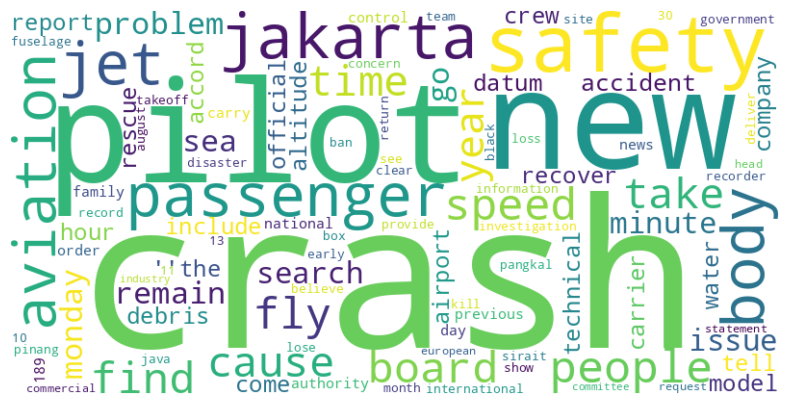

In [194]:
# Perform lemmatization and case normalization
c1_public_words_filtered_a['token'] = c1_public_words_filtered_a['token'].apply(lambda x: lemmatizer.lemmatize(x.lower()))

# Define the list of words for the word cloud
interesting_words = list(c1_public_token_counts_a['token'].iloc[:100])

# Filter the DataFrame to include only interesting words
interesting_words_counts = c1_public_words_filtered_a[c1_public_words_filtered_a['token'].isin(interesting_words)]['token'].value_counts()

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(interesting_words_counts)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-143-316b2422c79a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



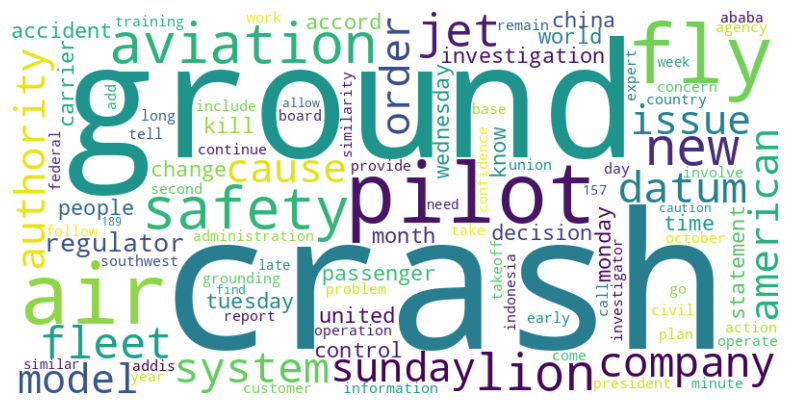

In [143]:
# Perform lemmatization and case normalization
c2_public_words_filtered_a['token'] = c2_public_words_filtered_a['token'].apply(lambda x: lemmatizer.lemmatize(x.lower()))

# Define the list of words for the word cloud
interesting_words = list(c2_public_token_counts_a['token'].iloc[:100])

# Filter the DataFrame to include only interesting words
interesting_words_counts = c2_public_words_filtered_a[c2_public_words_filtered_a['token'].isin(interesting_words)]['token'].value_counts()

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(interesting_words_counts)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-56-19c61e457a6e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



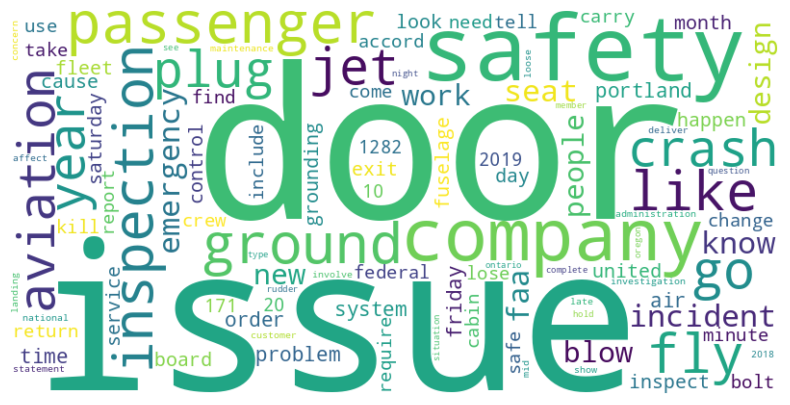

In [56]:
# Perform lemmatization and case normalization, handling NaN values
c3_public_words_filtered_a['token'] = c3_public_words_filtered_a['token'].apply(lambda x: lemmatizer.lemmatize(str(x).lower()) if pd.notna(x) else '')

# Define the list of words for the word cloud
interesting_words = list(c3_public_token_counts_a['token'].iloc[:100])

# Filter the DataFrame to include only interesting words
interesting_words_counts = c3_public_words_filtered_a[c3_public_words_filtered_a['token'].isin(interesting_words)]['token'].value_counts()

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(interesting_words_counts)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis - Scores

In [57]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

## Crash 1

In [195]:
c1_public_b = c1_public_b.copy()
c1_public_b['sentiment'] = np.nan
c1_public_b['score'] = np.nan
num_rows = c1_public_b.shape[0]

for i in range(num_rows):
  # grab review text to a variable
  text = c1_public_b['Text'].iloc[i]

  # calculate sentiments for non-missing review texts
  # the model supports up to 512 tokens
  # truncate longer texts
  if pd.notna(text):
    result = classifier(
        text,
        truncation=True,
        padding=True,
        max_length=512
    )

    c1_public_b.iloc[i, c1_public_b.columns.get_loc('sentiment')] = result[0]['label']
    c1_public_b.iloc[i, c1_public_b.columns.get_loc('score')] = result[0]['score']

  # display progress
  progress_percentage = round((i + 1) / num_rows * 100, 2)
  print(f'{i + 1}/{num_rows} ({progress_percentage}%)', end=' ')

  if (i + 1) % 10 == 0:
    print('')

print('====================')
print('Complete')

<ipython-input-195-28430790bffc>:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEGATIVE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



1/14 (7.14%) 2/14 (14.29%) 3/14 (21.43%) 4/14 (28.57%) 5/14 (35.71%) 6/14 (42.86%) 7/14 (50.0%) 8/14 (57.14%) 9/14 (64.29%) 10/14 (71.43%) 
11/14 (78.57%) 12/14 (85.71%) 13/14 (92.86%) 14/14 (100.0%) ====================
Complete


In [196]:
c1_public_b[c1_public_b['sentiment'] == 'POSITIVE']

,Headline,Date,Source,Text,Type,Incident,sentiment,score
29,Boeing Awarded 204 Million Contract for F A-1...,2018-10-26,Boeing,Boeing Awarded 204 Million Contract for F A-1...,News2,Lion Air,POSITIVE,0.749080
31,"Boeing Business Jets Delivers First BBJ MAX, U...",2018-10-26,Charter Hub,Boeing Business Jets announced at the recent N...,News2,Lion Air,POSITIVE,0.987783
34,Why is the Boeing 737 200 still flying anywhere,2018-10-26,Quora,Michael Benton' 'Follow'Frequent flyer' 'Upd...,News2,Lion Air,POSITIVE,0.990310
35,Etihad Boeing 787 fast becoming our flagship...,2018-10-26,NaN,Etihad Airways Boeing 787-9 Dreamliner''Coming...,News2,Lion Air,POSITIVE,0.996821
36,Singapore Airlines inducts Boeing 787-10 servi...,2018-10-25,TravelTrendsToday,News'Aviation'Singapore Airlines inducts Boein...,News2,Lion Air,POSITIVE,0.739838
39,Air Europa Converting Entire Long-Haul Fleet t...,2018-10-26,Airline Geeks,"PLANES October 26, 2018 12 23 pm ET'By Adri...",News2,Lion Air,POSITIVE,0.989843


In [197]:
c1_public_a = c1_public_a.copy()
c1_public_a['sentiment'] = np.nan
c1_public_a['score'] = np.nan
num_rows = c1_public_a.shape[0]

for i in range(num_rows):
  # grab review text to a variable
  text = c1_public_a['Text'].iloc[i]

  # calculate sentiments for non-missing review texts
  # the model supports up to 512 tokens
  # truncate longer texts
  if pd.notna(text):
    result = classifier(
        text,
        truncation=True,
        padding=True,
        max_length=512
    )

    c1_public_a.iloc[i, c1_public_a.columns.get_loc('sentiment')] = result[0]['label']
    c1_public_a.iloc[i, c1_public_a.columns.get_loc('score')] = result[0]['score']

  # display progress
  progress_percentage = round((i + 1) / num_rows * 100, 2)
  print(f'{i + 1}/{num_rows} ({progress_percentage}%)', end=' ')

  if (i + 1) % 10 == 0:
    print('')

print('====================')
print('Complete')

<ipython-input-197-f7eb622e6a6b>:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEGATIVE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



1/31 (3.23%) 2/31 (6.45%) 3/31 (9.68%) 4/31 (12.9%) 5/31 (16.13%) 6/31 (19.35%) 7/31 (22.58%) 8/31 (25.81%) 9/31 (29.03%) 10/31 (32.26%) 
11/31 (35.48%) 12/31 (38.71%) 13/31 (41.94%) 14/31 (45.16%) 15/31 (48.39%) 16/31 (51.61%) 17/31 (54.84%) 18/31 (58.06%) 19/31 (61.29%) 20/31 (64.52%) 
21/31 (67.74%) 22/31 (70.97%) 23/31 (74.19%) 24/31 (77.42%) 25/31 (80.65%) 26/31 (83.87%) 27/31 (87.1%) 28/31 (90.32%) 29/31 (93.55%) 30/31 (96.77%) 
31/31 (100.0%) ====================
Complete


## Crash 2

In [226]:
c2_public_b = c2_public_b.copy()
c2_public_b['sentiment'] = np.nan
c2_public_b['score'] = np.nan
num_rows = c2_public_b.shape[0]

for i in range(num_rows):
  # grab review text to a variable
  text = c2_public_b['Text'].iloc[i]

  # calculate sentiments for non-missing review texts
  # the model supports up to 512 tokens
  # truncate longer texts
  if pd.notna(text):
    result = classifier(
        text,
        truncation=True,
        padding=True,
        max_length=512
    )

    c2_public_b.iloc[i, c2_public_b.columns.get_loc('sentiment')] = result[0]['label']
    c2_public_b.iloc[i, c2_public_b.columns.get_loc('score')] = result[0]['score']

  # display progress
  progress_percentage = round((i + 1) / num_rows * 100, 2)
  print(f'{i + 1}/{num_rows} ({progress_percentage}%)', end=' ')

  if (i + 1) % 10 == 0:
    print('')

print('====================')
print('Complete')

<ipython-input-226-52c70077be04>:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEGATIVE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



1/34 (2.94%) 2/34 (5.88%) 3/34 (8.82%) 4/34 (11.76%) 5/34 (14.71%) 6/34 (17.65%) 7/34 (20.59%) 8/34 (23.53%) 9/34 (26.47%) 10/34 (29.41%) 
11/34 (32.35%) 12/34 (35.29%) 13/34 (38.24%) 14/34 (41.18%) 15/34 (44.12%) 16/34 (47.06%) 17/34 (50.0%) 18/34 (52.94%) 19/34 (55.88%) 20/34 (58.82%) 
21/34 (61.76%) 22/34 (64.71%) 23/34 (67.65%) 24/34 (70.59%) 25/34 (73.53%) 26/34 (76.47%) 27/34 (79.41%) 28/34 (82.35%) 29/34 (85.29%) 30/34 (88.24%) 
31/34 (91.18%) 32/34 (94.12%) 33/34 (97.06%) 34/34 (100.0%) ====================
Complete


In [227]:
c2_public_b[c2_public_b['sentiment'] == 'POSITIVE']

,Headline,Date,Source,Text,Type,Incident,sentiment,score
17,Boeing Adds Foreflight to Growing Aircraft Ser...,2019-03-07,Aviation Today,Boeing completed its acquisition of aviation a...,News,Ethiopian Airlines,POSITIVE,0.993235
21,Boeing's CEO says the deal to end the US-China...,2019-03-07,Business Insider,Purchases of US-made Boeing aircraft by China ...,News,Ethiopian Airlines,POSITIVE,0.660051
22,Boeing raises investments in Malaysia,2019-03-07,New Straits Times,The Boeing Company is committed to growing its...,News,Ethiopian Airlines,POSITIVE,0.997843
25,"SpaceX Crew Dragon capsule, built to carry hum...",2019-03-07,CNN,SpaceX is set to bring its Crew Dragon spacecr...,News,Ethiopian Airlines,POSITIVE,0.993482
30,Boeing Invests $3M for Embry-Riddle Scholarships,2019-03-08,AIN,Boing yesterday announced a $3 million grant t...,News,Ethiopian Airlines,POSITIVE,0.998043
32,"SpaceX Crew Dragon, built to carry humans, ret...",2019-03-08,CNN,SpaceX’s Crew Dragon capsule successfully comp...,News,Ethiopian Airlines,POSITIVE,0.994922
33,Splashdown! SpaceX’s Crew Dragon capsule retur...,2019-03-08,Fox News,SpaceX's unmanned Crew Dragon capsule splashed...,News,Ethiopian Airlines,POSITIVE,0.757158
34,SpaceX's Crew Dragon capsule returns to Earth ...,2019-03-08,NBC News,SpaceX’s Crew Dragon capsule returned safely t...,News,Ethiopian Airlines,POSITIVE,0.995599
36,"Boeing Spending Millions on Upgrades, Doubling...",2019-03-08,San Antonio Report,A thunderous roar of jet engines pierced the a...,News,Ethiopian Airlines,POSITIVE,0.992087
37,Boeing CEO Wants US-China to Reach Deal,2019-03-08,Aviation Today,Boeing sees a big opportunity in the Chinese m...,News,Ethiopian Airlines,POSITIVE,0.995408


In [228]:
c2_public_a = c2_public_a.copy()
c2_public_a['sentiment'] = np.nan
c2_public_a['score'] = np.nan
num_rows = c2_public_a.shape[0]

for i in range(num_rows):
  # grab review text to a variable
  text = c2_public_a['Text'].iloc[i]

  # calculate sentiments for non-missing review texts
  # the model supports up to 512 tokens
  # truncate longer texts
  if pd.notna(text):
    result = classifier(
        text,
        truncation=True,
        padding=True,
        max_length=512
    )

    c2_public_a.iloc[i, c2_public_a.columns.get_loc('sentiment')] = result[0]['label']
    c2_public_a.iloc[i, c2_public_a.columns.get_loc('score')] = result[0]['score']

  # display progress
  progress_percentage = round((i + 1) / num_rows * 100, 2)
  print(f'{i + 1}/{num_rows} ({progress_percentage}%)', end=' ')

  if (i + 1) % 10 == 0:
    print('')

print('====================')
print('Complete')

<ipython-input-228-005b3a232f78>:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEGATIVE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



1/43 (2.33%) 2/43 (4.65%) 3/43 (6.98%) 4/43 (9.3%) 5/43 (11.63%) 6/43 (13.95%) 7/43 (16.28%) 8/43 (18.6%) 9/43 (20.93%) 10/43 (23.26%) 
11/43 (25.58%) 12/43 (27.91%) 13/43 (30.23%) 14/43 (32.56%) 15/43 (34.88%) 16/43 (37.21%) 17/43 (39.53%) 18/43 (41.86%) 19/43 (44.19%) 20/43 (46.51%) 
21/43 (48.84%) 22/43 (51.16%) 23/43 (53.49%) 24/43 (55.81%) 25/43 (58.14%) 26/43 (60.47%) 27/43 (62.79%) 28/43 (65.12%) 29/43 (67.44%) 30/43 (69.77%) 
31/43 (72.09%) 32/43 (74.42%) 33/43 (76.74%) 34/43 (79.07%) 35/43 (81.4%) 36/43 (83.72%) 37/43 (86.05%) 38/43 (88.37%) 39/43 (90.7%) 40/43 (93.02%) 
41/43 (95.35%) 42/43 (97.67%) 43/43 (100.0%) ====================
Complete


In [229]:
c2_public_a[c2_public_a['sentiment'] == 'POSITIVE']

,Headline,Date,Source,Text,Type,Incident,sentiment,score


## Crash 3

In [165]:
c3_public_b = c3_public_b.copy()
c3_public_b['sentiment'] = np.nan
c3_public_b['score'] = np.nan
num_rows = c3_public_b.shape[0]

for i in range(num_rows):
  # grab review text to a variable
  text = c3_public_b['Text'].iloc[i]

  # calculate sentiments for non-missing review texts
  # the model supports up to 512 tokens
  # truncate longer texts
  if pd.notna(text):
    result = classifier(
        text,
        truncation=True,
        padding=True,
        max_length=512
    )

    c3_public_b.iloc[i, c3_public_b.columns.get_loc('sentiment')] = result[0]['label']
    c3_public_b.iloc[i, c3_public_b.columns.get_loc('score')] = result[0]['score']

  # display progress
  progress_percentage = round((i + 1) / num_rows * 100, 2)
  print(f'{i + 1}/{num_rows} ({progress_percentage}%)', end=' ')

  if (i + 1) % 10 == 0:
    print('')

print('====================')
print('Complete')

<ipython-input-165-fb60b22fae74>:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEGATIVE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



1/25 (4.0%) 2/25 (8.0%) 3/25 (12.0%) 4/25 (16.0%) 5/25 (20.0%) 6/25 (24.0%) 7/25 (28.0%) 8/25 (32.0%) 9/25 (36.0%) 10/25 (40.0%) 
11/25 (44.0%) 12/25 (48.0%) 13/25 (52.0%) 14/25 (56.0%) 15/25 (60.0%) 16/25 (64.0%) 17/25 (68.0%) 18/25 (72.0%) 19/25 (76.0%) 20/25 (80.0%) 
21/25 (84.0%) 22/25 (88.0%) 23/25 (92.0%) 24/25 (96.0%) 25/25 (100.0%) ====================
Complete


In [166]:
c3_public_b[c3_public_b['sentiment'] == 'POSITIVE']

,Headline,Date,Source,Text,Type,Incident,sentiment,score
12,Bell-Boeing Secures Contract to Aid MV-22 Ospr...,2024-01-02,Yahoo Finance,"Bell-Boeing, a joint venture (JV) between The ...",News,Alaska Airlines,POSITIVE,0.997239
17,Singapore Airlines Passes United Airlines As L...,2024-01-02,Simply Flying,Singapore Airlines closed out 2023 reaching a ...,News,Alaska Airlines,POSITIVE,0.975051
20,Vietnam Airlines Boeing 787 suffered a cracked...,2024-01-03,AirLive,"On the 26th of December 2023, a Vietnam Airlin...",News,Alaska Airlines,POSITIVE,0.818573
25,Akasa Air adds two Boeing 737 MAX 8 aircraft w...,2024-01-03,The Economic Times,Akasa Air added wings to its international fly...,News,Alaska Airlines,POSITIVE,0.997028
27,Akasa Air expansion plans Report says budget ...,2024-01-03,Financial Express,India s budget carrier Akasa Air is in the pro...,News,Alaska Airlines,POSITIVE,0.995785
31,Why the Market Dipped But Boeing (BA) Gained T...,2024-01-04,Yahoo Finance,Boeing (BA) closed the latest trading day at ...,News,Alaska Airlines,POSITIVE,0.784606
34,Alaska Airlines takes delivery of our first lo...,2024-01-04,Yahoo Finance,New aircraft is part of our strategic fleet pl...,News,Alaska Airlines,POSITIVE,0.999234


In [167]:
c3_public_a = c3_public_a.copy()
c3_public_a['sentiment'] = np.nan
c3_public_a['score'] = np.nan
num_rows = c3_public_a.shape[0]

for i in range(num_rows):
  # grab review text to a variable
  text = c3_public_a['Text'].iloc[i]

  # calculate sentiments for non-missing review texts
  # the model supports up to 512 tokens
  # truncate longer texts
  if pd.notna(text):
    result = classifier(
        text,
        truncation=True,
        padding=True,
        max_length=512
    )

    c3_public_a.iloc[i, c3_public_a.columns.get_loc('sentiment')] = result[0]['label']
    c3_public_a.iloc[i, c3_public_a.columns.get_loc('score')] = result[0]['score']

  # display progress
  progress_percentage = round((i + 1) / num_rows * 100, 2)
  print(f'{i + 1}/{num_rows} ({progress_percentage}%)', end=' ')

  if (i + 1) % 10 == 0:
    print('')

print('====================')
print('Complete')

<ipython-input-167-861c4a4560d0>:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NEGATIVE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



1/27 (3.7%) 2/27 (7.41%) 3/27 (11.11%) 4/27 (14.81%) 5/27 (18.52%) 6/27 (22.22%) 7/27 (25.93%) 8/27 (29.63%) 9/27 (33.33%) 10/27 (37.04%) 
11/27 (40.74%) 12/27 (44.44%) 13/27 (48.15%) 14/27 (51.85%) 15/27 (55.56%) 16/27 (59.26%) 17/27 (62.96%) 18/27 (66.67%) 19/27 (70.37%) 20/27 (74.07%) 
21/27 (77.78%) 22/27 (81.48%) 23/27 (85.19%) 24/27 (88.89%) 25/27 (92.59%) 26/27 (96.3%) 27/27 (100.0%) ====================
Complete


## Pie Chart

In [198]:
before_df = pd.concat([c1_public_b, c2_public_b, c3_public_b], ignore_index=True)
before_df.head(3)

,Headline,Date,Source,Text,Type,Incident,sentiment,score
0,The latest on the Boeing NMA,2018-10-26,Proponent,"OCTOBER 26, 2018'Industry Information'What is ...",News2,Lion Air,NEGATIVE,0.977410
1,Boeing Awarded 204 Million Contract for F A-1...,2018-10-26,Boeing,Boeing Awarded 204 Million Contract for F A-1...,News2,Lion Air,POSITIVE,0.749080
2,A fuel tanker hit the wing of a new American A...,2018-10-26,Business Insider,A fuel truck hit the wing of an American Airli...,News2,Lion Air,NEGATIVE,0.998417


In [199]:
# Create a DataFrame with all unique combinations of 'Type' and 'sentiment'
all_combinations = pd.DataFrame(list(itertools.product(before_df['Incident'].unique(), before_df['sentiment'].unique())), columns=['Incident', 'sentiment'])

# Merge with the grouped DataFrame to include the counts (filling NaN with 0)
df_sentiment_category_b = pd.merge(all_combinations, before_df.groupby(['Incident', 'sentiment'], as_index=False).agg({'Headline': 'count'}),
                                    on=['Incident', 'sentiment'], how='left').fillna(0)

# Rename the 'Headline' column to 'count'
df_sentiment_category_b = df_sentiment_category_b.rename(columns={'Headline': 'count'})

df_sentiment_category_b

,Incident,sentiment,count
0,Lion Air,NEGATIVE,8
1,Lion Air,POSITIVE,6
2,Ethiopian Airlines,NEGATIVE,20
3,Ethiopian Airlines,POSITIVE,14
4,Alaska Airlines,NEGATIVE,18
5,Alaska Airlines,POSITIVE,7


In [200]:
fig = make_subplots(
    rows=1,
    cols=3,
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Lion Air Flight 610 (Oct. 2018)', 'Ethiopian Airlines Flight 302 (Mar. 2019)', 'Alaska Airlines Flight 1282 (Jan. 2024)']
)

pie_labels = ['NEGATIVE', 'POSITIVE']
marker_colors = ['#ef5350', '#8bc34a']

def add_sentiment_trace(fig, col, num):
    # Filter data for the given Incident
    category_data = df_sentiment_category_b[df_sentiment_category_b['Incident'] == num]

    # Create a dictionary to convert sentiment values to integers
    sentiment_counts = dict(zip(category_data['sentiment'], category_data['count'].astype(int)))

    # Get count values for both sentiments, filling missing values with 0
    values = [sentiment_counts.get(sentiment, 0) for sentiment in pie_labels]

    fig.add_trace(
        go.Pie(
            labels=pie_labels,
            values=values,
            text=pie_labels,
            marker_colors=marker_colors,
            textposition='inside',
            textfont=dict(
                size=10,
                color='white'
            ),
            insidetextorientation='horizontal',
            sort=False,
        ), 1, col
    )

add_sentiment_trace(fig, 1, 'Lion Air')
add_sentiment_trace(fig, 2, 'Ethiopian Airlines')
add_sentiment_trace(fig, 3, 'Alaska Airlines')

fig.update_layout(
    title=dict(
        text='<b>DistilBERT Sentiments by Incident</b><br><span style="color: #aaa;">Before the Incidents Occur</span>',
        x=0,
        y=0.9,
        xanchor='left',
        yanchor='top',
    ),
    font_family='Helvetica, Arial, Inter, sans-serif',
    showlegend=False,
    margin=dict(
        l=0,
        r=0,
        t=125,
        b=50,
    ),
    height=450
)

fig.show()


In [201]:
after_df = pd.concat([c1_public_a, c2_public_a, c3_public_a], ignore_index=True)

In [202]:
# Create a DataFrame with all unique combinations of 'Type' and 'sentiment'
all_combinations = pd.DataFrame(list(itertools.product(after_df['Incident'].unique(), after_df['sentiment'].unique())), columns=['Incident', 'sentiment'])

# Merge with the grouped DataFrame to include the counts (filling NaN with 0)
df_sentiment_category_a = pd.merge(all_combinations, after_df.groupby(['Incident', 'sentiment'], as_index=False).agg({'Headline': 'count'}),
                                    on=['Incident', 'sentiment'], how='left').fillna(0)

# Rename the 'Headline' column to 'count'
df_sentiment_category_a = df_sentiment_category_a.rename(columns={'Headline': 'count'})

df_sentiment_category_a

,Incident,sentiment,count
0,Lion Air,NEGATIVE,30.0
1,Lion Air,POSITIVE,1.0
2,Ethiopian Airlines,NEGATIVE,43.0
3,Ethiopian Airlines,POSITIVE,0.0
4,Alaska Airlines,NEGATIVE,27.0
5,Alaska Airlines,POSITIVE,0.0


In [203]:
fig = make_subplots(
    rows=1,
    cols=3,
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Lion Air Flight 610 (Oct. 2018)', 'Ethiopian Airlines Flight 302 (Mar. 2019)', 'Alaska Airlines Flight 1282 (Jan. 2024)']
)

pie_labels = ['NEGATIVE', 'POSITIVE']
marker_colors = ['#ef5350', '#8bc34a']

def add_sentiment_trace(fig, col, num):
    # Filter data for the given Incident
    category_data = df_sentiment_category_a[df_sentiment_category_a['Incident'] == num]

    # Create a dictionary to convert sentiment values to integers
    sentiment_counts = dict(zip(category_data['sentiment'], category_data['count'].astype(int)))

    # Get count values for both sentiments, filling missing values with 0
    values = [sentiment_counts.get(sentiment, 0) for sentiment in pie_labels]

    fig.add_trace(
        go.Pie(
            labels=pie_labels,
            values=values,
            text=pie_labels,
            marker_colors=marker_colors,
            textposition='inside',
            textfont=dict(
                size=10,
                color='white'
            ),
            insidetextorientation='horizontal',
            sort=False,
        ), 1, col
    )

add_sentiment_trace(fig, 1, 'Lion Air')
add_sentiment_trace(fig, 2, 'Ethiopian Airlines')
add_sentiment_trace(fig, 3, 'Alaska Airlines')


fig.update_layout(
    title=dict(
        text='<b>DistilBERT Sentiments by Incident</b><br><span style="color: #aaa;">After the Incidents Occur</span>',
        x=0,
        y=0.9,
        xanchor='left',
        yanchor='top',
    ),
    font_family='Helvetica, Arial, Inter, sans-serif',
    showlegend=False,
    margin=dict(
        l=0,
        r=0,
        t=125,
        b=50,
    ),
    height=450
)

fig.show()

## Slope Graph

In [204]:
all_sentiments = pd.DataFrame(list(itertools.product(before_df['Incident'].unique(), before_df['sentiment'].unique())), columns=['Incident', 'sentiment'])
all_sentiments

,Incident,sentiment
0,Lion Air,NEGATIVE
1,Lion Air,POSITIVE
2,Ethiopian Airlines,NEGATIVE
3,Ethiopian Airlines,POSITIVE
4,Alaska Airlines,NEGATIVE
5,Alaska Airlines,POSITIVE


In [205]:
after_avg = after_df.groupby(['sentiment','Incident'])['score'].mean().reset_index()
after_avg

avg_score_a = pd.merge(all_sentiments, after_avg, on=['Incident', 'sentiment'], how='left').fillna(0)

avg_score_a['Pre_Post'] = 'Post'
avg_score_a

,Incident,sentiment,score,Pre_Post
0,Lion Air,NEGATIVE,0.995041,Post
1,Lion Air,POSITIVE,0.643726,Post
2,Ethiopian Airlines,NEGATIVE,0.989658,Post
3,Ethiopian Airlines,POSITIVE,0.000000,Post
4,Alaska Airlines,NEGATIVE,0.996824,Post
5,Alaska Airlines,POSITIVE,0.000000,Post


In [206]:
before_avg = before_df.groupby(['sentiment','Incident'])['score'].mean().reset_index()
before_avg

avg_score_b = pd.merge(all_sentiments, before_avg, on=['Incident', 'sentiment'], how='left').fillna(0)

avg_score_b['Pre_Post'] = 'Pre'
avg_score_b

,Incident,sentiment,score,Pre_Post
0,Lion Air,NEGATIVE,0.941571,Pre
1,Lion Air,POSITIVE,0.908946,Pre
2,Ethiopian Airlines,NEGATIVE,0.995294,Pre
3,Ethiopian Airlines,POSITIVE,0.942471,Pre
4,Alaska Airlines,NEGATIVE,0.978923,Pre
5,Alaska Airlines,POSITIVE,0.938217,Pre


In [207]:
avg_scores = pd.concat([avg_score_b, avg_score_a], axis = 0)
avg_scores

,Incident,sentiment,score,Pre_Post
0,Lion Air,NEGATIVE,0.941571,Pre
1,Lion Air,POSITIVE,0.908946,Pre
2,Ethiopian Airlines,NEGATIVE,0.995294,Pre
3,Ethiopian Airlines,POSITIVE,0.942471,Pre
4,Alaska Airlines,NEGATIVE,0.978923,Pre
5,Alaska Airlines,POSITIVE,0.938217,Pre
0,Lion Air,NEGATIVE,0.995041,Post
1,Lion Air,POSITIVE,0.643726,Post
2,Ethiopian Airlines,NEGATIVE,0.989658,Post
3,Ethiopian Airlines,POSITIVE,0.000000,Post


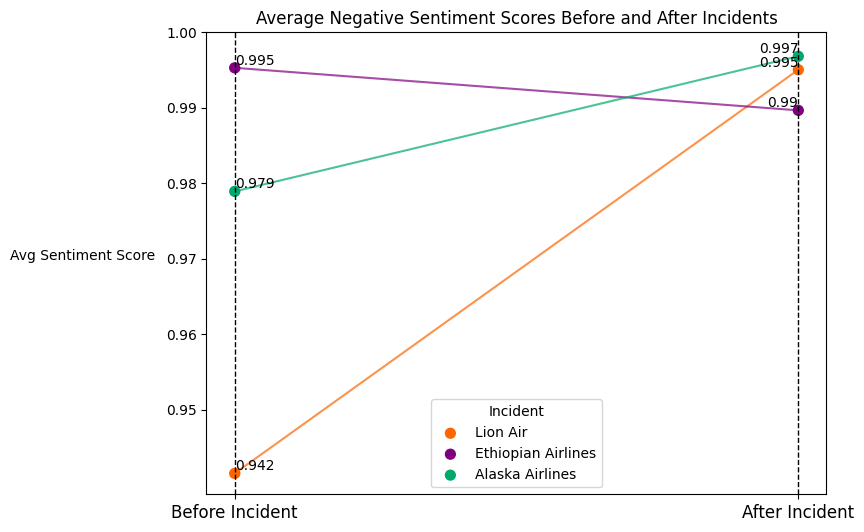

In [208]:
colors = {
    'Lion Airlines': '#FC6600',
    'Ethiopian Airlines': '#800080',
    'Alaska Airlines': '#00A86B'
}

# Filter data for negative sentiment
negative = avg_scores[avg_scores['sentiment'] == 'NEGATIVE']

# Separate data for Pre and Post incidents
pre_data = negative[negative['Pre_Post'] == 'Pre']
post_data = negative[negative['Pre_Post'] == 'Post']

# Create a slope graph
fig, ax = plt.subplots(figsize=(8, 6))

# Plot average scores with lines
for incident in negative['Incident'].unique():
    before_score = pre_data.loc[pre_data['Incident'] == incident, 'score'].item()
    after_score = post_data.loc[post_data['Incident'] == incident, 'score'].item()

    # Get the color for the current incident from the dictionary
    incident_color = colors.get(incident, '#FC6600')

    # Plot the points with custom colors
    ax.scatter([1, 2], [before_score, after_score], s=50, label=incident, c=[incident_color, incident_color])

    # Connect the points with lines with custom colors
    ax.plot([1, 2], [before_score, after_score], marker='o', linestyle='-', alpha=0.7, color=incident_color)

    # Label the points with their scores rounded to 3 decimal places
    ax.text(1, before_score, f'{round(before_score, 3)}', ha='left', va='bottom', fontsize=10, color='black')
    ax.text(2, after_score, f'{round(after_score, 3)}', ha='right', va='bottom', fontsize=10, color='black')

# Set x-axis ticks and labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Before Incident', 'After Incident'], fontsize='large')

ax.set_yticks([0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

# Draw black lines for "Before Incident" and "After Incident"
ax.axvline(x=1, color='black', linestyle='--', linewidth=1)
ax.axvline(x=2, color='black', linestyle='--', linewidth=1)

# Add legend without the black rectangle
plt.legend(title='Incident')

# Set title and labels
plt.title('Average Negative Sentiment Scores Before and After Incidents')
plt.ylabel('Avg Sentiment Score', rotation=0,labelpad=60)

plt.show()

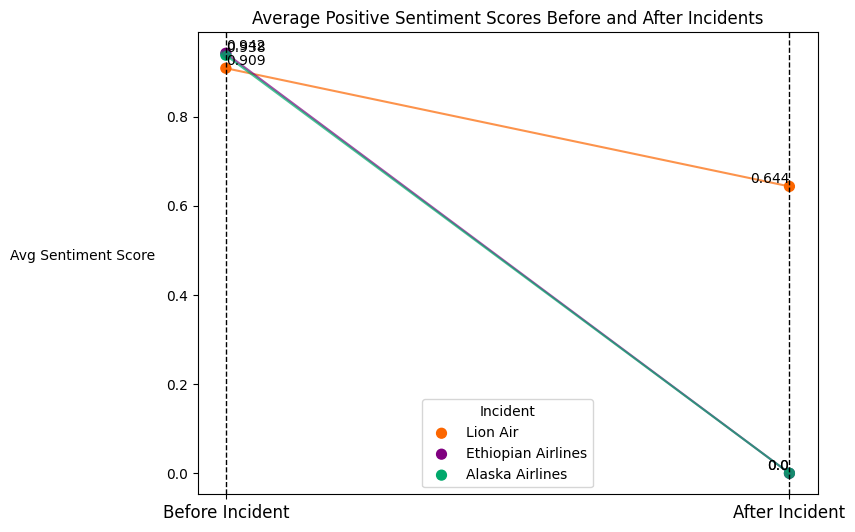

In [209]:
colors = {
    'Lion Airlines': '#FFA500',
    'Ethiopian Airlines': '#800080',
    'Alaska Airlines': '#00A86B',
}

# Filter data for positive sentiment
positive = avg_scores[avg_scores['sentiment'] == 'POSITIVE']

# Separate data for Pre and Post incidents
pre_data = positive[positive['Pre_Post'] == 'Pre']
post_data = positive[positive['Pre_Post'] == 'Post']

# Create a slope graph
fig, ax = plt.subplots(figsize=(8, 6))

# Plot average scores with lines
for incident in positive['Incident'].unique():
    before_score = pre_data.loc[pre_data['Incident'] == incident, 'score'].item()
    after_score = post_data.loc[post_data['Incident'] == incident, 'score'].item()

    # Get the color for the current incident from the dictionary
    incident_color = colors.get(incident, '#FC6600')

    # Plot the points with custom colors
    ax.scatter([1, 2], [before_score, after_score], s=50, label=incident, c=[incident_color, incident_color])

    # Connect the points with lines with custom colors
    ax.plot([1, 2], [before_score, after_score], marker='o', linestyle='-', alpha=0.7, color=incident_color)

    # Label the points with their scores rounded to 3 decimal places
    ax.text(1, before_score, f'{round(before_score, 3)}', ha='left', va='bottom', fontsize=10, color='black')
    ax.text(2, after_score, f'{round(after_score, 3)}', ha='right', va='bottom', fontsize=10, color='black')

# Set x-axis ticks and labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Before Incident', 'After Incident'], fontsize='large')


# Draw black lines for "Before Incident" and "After Incident"
ax.axvline(x=1, color='black', linestyle='--', linewidth=1)
ax.axvline(x=2, color='black', linestyle='--', linewidth=1)

plt.legend(title='Incident')

# Set title and labels
plt.title('Average Positive Sentiment Scores Before and After Incidents')
plt.ylabel('Avg Sentiment Score', rotation=0,labelpad=60)

plt.show()

### Topic Modelling

In [ ]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ISHIKA
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
data = pd.read_excel(excel_file, sheet_name = 'topicmodelling_crash2')

In [ ]:
data

,Headline,Date,Source,Text,Type,Incident
0,Boeing Response to Ethiopian Airlines Group CE...,2019-03-26,Boeing,As the lead engineer on a project earlier in m...,Company,Ethiopian Airlines
1,Boeing testing software changes to 737 MAX planes,2019-03-25,CNN,Pilots from the three American carriers that f...,News,Ethiopian Airlines
2,Ethiopian Airlines Boss Says Stall-Prevention ...,2019-03-25,The Wall Street Journal,Ethiopian Airlines’ chief executive said a sta...,News,Ethiopian Airlines
3,"In Test of Boeing Jet, Pilots Had 40 Seconds t...",2019-03-25,New York Times,During flight simulations recreating the probl...,News,Ethiopian Airlines
4,"Fast-Tracked Aircraft Certification, Pushed by...",2019-03-24,The Wall Street Journal,The safety-certification process that put the ...,News,Ethiopian Airlines
...,...,...,...,...,...,...
108,Why is the Boeing 777-8 selling so poorly?,2019-03-09,Quora,The 777–8 is more-or-less the next version of ...,News,Ethiopian Airlines
109,Why did Boeing choose foldable wingtips for 77...,2019-03-09,Quora,The longer wing on the 777X adds 23ft/7M to th...,News,Ethiopian Airlines
110,Is the FAA Corrupt? Their 737 Reaction,2019-03-10,Reddit,Is this the plane that crashed today? I’m assu...,Social Media,Ethiopian Airlines
111,[PSA] Try to avoid flying on a Boeing 737 MAX ...,2019-03-12,Reddit,You may have heard about the recent Ethiopian ...,Social Media,Ethiopian Airlines


In [ ]:
# Define the dates to compare and the source to filter by
target_dates = ["2019-03-10", "2019-03-11", "2019-03-12","2019-03-13", "2019-03-17", "2019-03-18", "2019-03-26"]
source = "Boeing"

# Filter data for the specified source and dates
filtered_data = data[(data["Source"] == source) & (data["Date"].isin(target_dates))]

In [ ]:
filtered_data

,Headline,Date,Source,Text,Type,Incident
0,Boeing Response to Ethiopian Airlines Group CE...,2019-03-26,Boeing,As the lead engineer on a project earlier in m...,Company,Ethiopian Airlines
21,Letter from Boeing CEO Dennis Muilenburg to Ai...,2019-03-18,Boeing,"We know lives depend on the work we do, and ou...",Company,Ethiopian Airlines
23,Boeing CEO Muilenburg Issues Statement on Ethi...,2019-03-17,Boeing,"Boeing Chairman, President, and CEO Dennis Mui...",Company,Ethiopian Airlines
36,"In Consultation with the FAA, NTSB and its Cus...",2019-03-13,Boeing,Boeing continues to have full confidence in th...,Company,Ethiopian Airlines
52,Boeing Statement on 737 MAX Operation,2019-03-12,Boeing,Safety is Boeing’s number one priority and we ...,Company,Ethiopian Airlines
62,Boeing Statement on 737 MAX Software Enhancement,2019-03-11,Boeing,The Boeing Company is deeply saddened by the l...,Company,Ethiopian Airlines
73,Updated: Boeing Statement on Ethiopian Airline...,2019-03-10,Boeing,Boeing is deeply saddened to learn of the pass...,Company,Ethiopian Airlines


In [ ]:
df = filtered_data

# Reverse the order of the DataFrame
df = df.iloc[::-1].reset_index(drop=True)  # Reverse rows and reset index

df

,Headline,Date,Source,Text,Type,Incident
0,Updated: Boeing Statement on Ethiopian Airline...,2019-03-10,Boeing,Boeing is deeply saddened to learn of the pass...,Company,Ethiopian Airlines
1,Boeing Statement on 737 MAX Software Enhancement,2019-03-11,Boeing,The Boeing Company is deeply saddened by the l...,Company,Ethiopian Airlines
2,Boeing Statement on 737 MAX Operation,2019-03-12,Boeing,Safety is Boeing’s number one priority and we ...,Company,Ethiopian Airlines
3,"In Consultation with the FAA, NTSB and its Cus...",2019-03-13,Boeing,Boeing continues to have full confidence in th...,Company,Ethiopian Airlines
4,Boeing CEO Muilenburg Issues Statement on Ethi...,2019-03-17,Boeing,"Boeing Chairman, President, and CEO Dennis Mui...",Company,Ethiopian Airlines
5,Letter from Boeing CEO Dennis Muilenburg to Ai...,2019-03-18,Boeing,"We know lives depend on the work we do, and ou...",Company,Ethiopian Airlines
6,Boeing Response to Ethiopian Airlines Group CE...,2019-03-26,Boeing,As the lead engineer on a project earlier in m...,Company,Ethiopian Airlines


In [ ]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Custom stop words
extra_stop_words = {"boeing", "737", "max", "flight", "airline", "air", "airplane", "ethiopian", "ethiopia", "crash","aircraft", "safety", "work", "accident","control", "company", "customer", "team"}  # Add other common words you want to remove
stop_words = STOP_WORDS.union(extra_stop_words)

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 1]
    return tokens

In [ ]:
# Preprocess the text data
processed_texts = [preprocess_text(text) for text in df["Text"]]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Train an LDA model with 3 topics (as an example)
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.015*"lion" + 0.015*"people" + 0.012*"commitment" + 0.012*"support" + 0.012*"customer"
Topic 1: 0.002*"people" + 0.002*"crew" + 0.002*"safe" + 0.002*"work" + 0.002*"pilot"
Topic 2: 0.019*"continue" + 0.015*"information" + 0.010*"work" + 0.010*"support" + 0.010*"update"
Topic 3: 0.019*"faa" + 0.013*"enhancement" + 0.011*"software" + 0.011*"manual" + 0.011*"law"
Topic 4: 0.014*"airline" + 0.014*"crew" + 0.011*"airlines" + 0.011*"passenger" + 0.011*"share"


In [ ]:
# Function to evaluate perplexity for a given number of topics
def calculate_perplexity(corpus, dictionary, num_topics):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    perplexity = lda_model.log_perplexity(corpus)  # Log perplexity
    return perplexity

# Test different number of topics
perplexity_scores = {}
for num_topics in range(1, 10):  # Trying with 1 to 4 topics
    perplexity_scores[num_topics] = calculate_perplexity(corpus, dictionary, num_topics)

# Display the perplexity scores for different number of topics
for num_topics, score in perplexity_scores.items():
    print(f"Perplexity for {num_topics} topic(s): {score}")

Perplexity for 1 topic(s): -6.1721760045300735
Perplexity for 2 topic(s): -6.233116804680845
Perplexity for 3 topic(s): -6.272746716198084
Perplexity for 4 topic(s): -6.320043408723028
Perplexity for 5 topic(s): -6.415931719984557
Perplexity for 6 topic(s): -6.530239947140217
Perplexity for 7 topic(s): -6.519364733752367
Perplexity for 8 topic(s): -6.539063467702887
Perplexity for 9 topic(s): -6.624229949403991


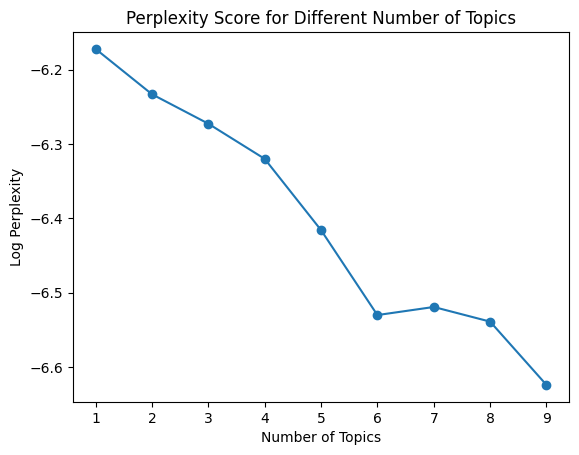

In [ ]:
# Plot the perplexity scores
plt.plot(list(perplexity_scores.keys()), list(perplexity_scores.values()), marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Log Perplexity")
plt.title("Perplexity Score for Different Number of Topics")
plt.show()

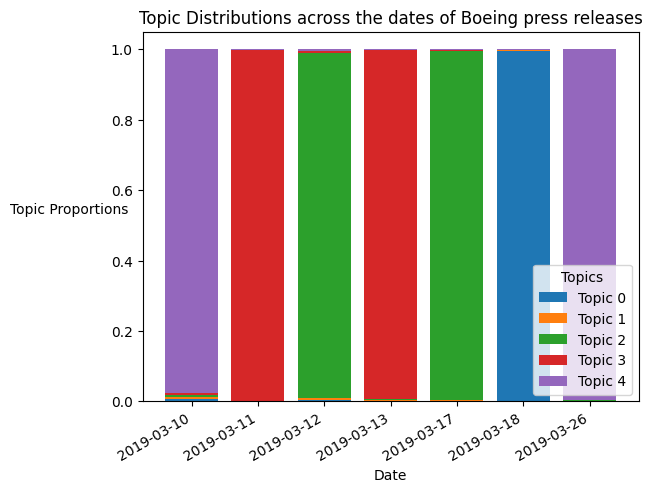

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,0.006189,0.006063,0.006167,0.006215,0.975366
1,0.000912,0.000905,0.000914,0.996356,0.000912
2,0.005179,0.005130,0.979353,0.005189,0.005149
3,0.002576,0.002533,0.002570,0.989751,0.002571
4,0.002198,0.002175,0.991229,0.002207,0.002192
5,0.996771,0.000800,0.000808,0.000809,0.000811
6,0.001119,0.001106,0.001112,0.001113,0.995551


In [ ]:
# Get the topic distribution for each document
topic_distributions = []
for doc in corpus:
    topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)  # Get topic proportions
    topic_distributions.append([prob for _, prob in topic_dist])  # Store probabilities for each topic

# Convert to DataFrame for easier plotting
topic_df = pd.DataFrame(topic_distributions, columns=[f"Topic {i}" for i in range(5)])

# Create a stacked bar chart for the topic distributions
num_docs = len(topic_df)

# Position for each bar along the x-axis
bar_positions = np.arange(num_docs)

# Initialize the base for stacking
bottom = np.zeros(num_docs)

# Plot each topic in a stacked manner
for i, column in enumerate(topic_df.columns):
    plt.bar(bar_positions, topic_df[column], bottom=bottom, label=column)  # Stacked bars
    bottom += topic_df[column]  # Update bottom for stacking

plt.xticks(bar_positions, df["Date"],rotation=30,ha='right')
plt.xlabel("Date")
plt.ylabel("Topic Proportions", rotation=0, labelpad=30)
plt.title("Topic Distributions across the dates of Boeing press releases")
plt.legend(title="Topics")

# Save the plot to a file (PNG format)
plt.savefig("Topic modelling.png", dpi=300, bbox_inches='tight')  # Save as a PNG with high resolution and tight bounding box
plt.show()

topic_df

# Vader Scores Sentiment

In [110]:
crash2 = pd.read_excel(excel_file, sheet_name = 'crash2_vader')
crash2.shape

(140, 11)

In [111]:
#subset for public sentiment only
public = crash2[crash2['Type']=='Public']
public.head()

,...1,Headline,Date,Source,Text,Type,Incident,compound,pos,neu,neg
3,3,Atlas Air 767 Entered Steep Dive Before Impact...,2019-02-25,AIN,National Transportation Safety Board (NTSB) Ch...,Public,Ethiopian Airlines,-0.886,0.028,0.922,0.050
4,4,Cambodia Weighs Commitment To Cape Town Conven...,2019-02-25,AIN,Cambodia is moving toward strengthening its le...,Public,Ethiopian Airlines,0.992,0.117,0.865,0.017
7,7,Embraer Shareholders Approve Joint Venture wit...,2019-02-26,AIN,Embraer received shareholder approval to proce...,Public,Ethiopian Airlines,0.993,0.164,0.818,0.018
9,9,Boeing Lifts Lid on Loyal Wingman,2019-02-27,AIN,"On February 27, the Australian defense ministe...",Public,Ethiopian Airlines,0.975,0.095,0.884,0.020
10,10,Boeing Inks Major Deals at Trump-Kim Summit,2019-02-27,AIN,The U.S.-North Korea Summit in Hanoi saw a flu...,Public,Ethiopian Airlines,0.989,0.096,0.904,0.000


In [232]:
public.shape

(119, 11)

In [112]:
s1 = public[(public['Date'] >= '2019-03-07') & (public['Date'] <= '2019-03-09')]

avg_s1 = round((np.mean(s1['compound']))/len(s1), 4)
avg_s1

0.0146

In [113]:
s2 = public[(public['Date'] >= '2019-03-10') & (public['Date'] <= '2019-03-13')]

avg_s2 = round((np.mean(s2['compound']))/len(s2), 4)
avg_s2

-0.0067

In [114]:
s3 = public[(public['Date'] >= '2019-03-14') & (public['Date'] <= '2019-03-16')]

avg_s3 = round((np.mean(s3['compound']))/len(s3), 4)
avg_s3

-0.0412

In [115]:
s4 = public[(public['Date'] >= '2019-03-19') & (public['Date'] <= '2019-03-21')]

avg_s4 = round((np.mean(s4['compound']))/len(s4), 4)
avg_s4

-0.0135

In [116]:
average_scores = [avg_s1, None, avg_s2, None, avg_s3, None, None, avg_s4]
average_scores

[0.0146, None, -0.0067, None, -0.0412, None, None, -0.0135]

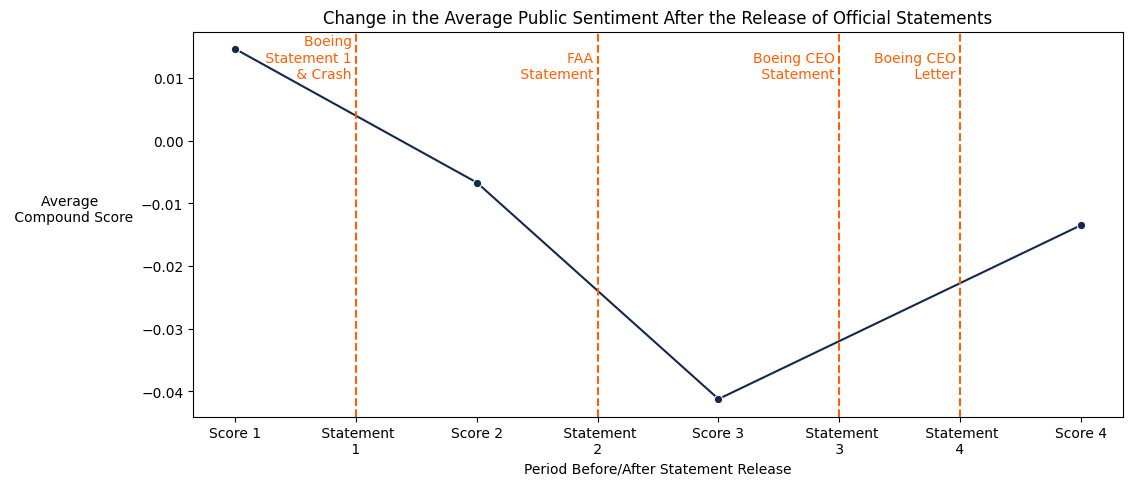

In [117]:
# Define the order of the date ranges
date_ranges = ["Score 1", " Statement\n 1 ", "Score 2", " Statement\n 2 ", "Score 3", " Statement\n 3 ", " Statement\n 4 ", "Score 4"]

data = {
    "Date_Range": date_ranges,
    "Average_Score": average_scores
}

plt.figure(figsize=(12, 5))

sns.lineplot(data=data, x='Date_Range', y='Average_Score', marker='o', color='#13294B')

# Add vertical dashed lines at specific x-axis values
for x_value, text in [(' Statement\n 1 ', "Boeing \n Statement 1 \n & Crash "), (' Statement\n 2 ', "FAA \n Statement "), (' Statement\n 3 ', "Boeing CEO \n Statement "), (' Statement\n 4 ', "Boeing CEO \n Letter ")]:
    plt.axvline(x=date_ranges.index(x_value), linestyle='--', color='#FF5F05')
    plt.text(date_ranges.index(x_value), 0.0095, text, rotation=0, va='bottom', ha='right', color='#FF5F05')

# Set plot title and axis labels
plt.title("Change in the Average Public Sentiment After the Release of Official Statements")
plt.xlabel("Period Before/After Statement Release")
plt.ylabel("Average \n Compound Score", rotation = 0, labelpad= 50)

# Rotate x-axis labels
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.show()

In [118]:
boeing = yf.download(tickers = "BA",
                  start = '2019-03-07',
                  end = '2019-03-21')
boeing.name = 'Boeing'

[*********************100%%**********************]  1 of 1 completed


<ipython-input-119-71827f4e3234>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-119-71827f4e3234>:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-119-71827f4e3234>:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-119-71827f4e3234>:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consis

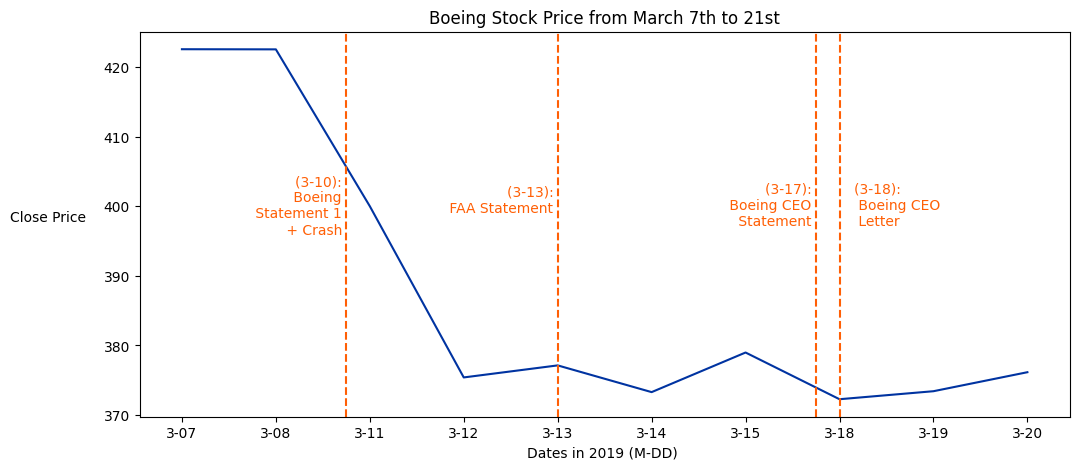

In [119]:
dates = ['3-07','3-08','3-11','3-12','3-13','3-14','3-15','3-18','3-19','3-20']
close_prices = boeing['Close']

plt.figure(figsize=(12, 5))
plt.plot(dates, close_prices, label='Close Price', color='#0033A1')
plt.axvline(x=dates.index('3-11') - 0.25, color='#FF5F05', linestyle='--', label='Boeing \n Statement 1 \n + Crash')
plt.text(dates.index('3-11') - 0.25, close_prices[dates.index('3-11')] - 4, '(3-10): \n Boeing \n Statement 1 \n + Crash ',
         color='#FF5F05', ha='right')

plt.axvline(x=dates.index('3-13'), color='#FF5F05', linestyle='--', label="FAA Statement")
plt.text(dates.index('3-13'), close_prices[dates.index('3-13')] + 22, '(3-13): \n FAA Statement ',
         color='#FF5F05', ha='right')

plt.axvline(x=dates.index('3-18') - 0.25, color='#FF5F05', linestyle='--', label="Boeing CEO Statement")
plt.text(dates.index('3-18') - 0.25, close_prices[dates.index('3-18')] + 25 , '(3-17): \n Boeing CEO \n Statement ',
         color='#FF5F05', ha='right')

plt.axvline(x=dates.index('3-18'), color='#FF5F05', linestyle='--', label="Boeing CEO Letter")
plt.text(dates.index('3-18') + 0.15, close_prices[dates.index('3-18')] + 25 , '(3-18): \n Boeing CEO \n Letter ',
         color='#FF5F05', ha='left')

plt.title('Boeing Stock Price from March 7th to 21st')
plt.xlabel('Dates in 2019 (M-DD) ')
plt.ylabel('Close Price', rotation = 0, labelpad = 40)
#plt.legend()
plt.grid(False)
plt.show()